<a href="https://colab.research.google.com/github/brunobro/classification-selection-wheat-cultivars-water-saline-stress-machine-learning-multicriteria-analysis/blob/main/ClassificationOfWheatCultivars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classification and selection of wheat cultivars under water and saline stress using advanced machine learning and multicriteria decision analysis**

**Abstract:** Water stress and soil salinization are major abiotic factors limiting wheat productivity. Addressing these challenges requires identifying wheat cultivars with enhanced resilience to ensure agricultural sustainability. This study assessed the resilience of eleven commercial wheat cultivars recommended for the Brazilian Cerrado region under water and saline stress using statistical tests, machine learning, and decision-making methods. A 3 × 11 factorial experiment was conducted in a completely randomized design, with three osmotic treatments (control, saline stress, water stress) and four replicates per treatment. Seeds were exposed to iso-osmotic solutions (-0.30 MPa) prepared with polyethylene glycol (PEG-6000) or NaCl to evaluate germination, seedling growth, water content, thousand-seed weight, and emergence rates. Statistical significance was analyzed using the Kruskal–Wallis test and Dwass–Steel–Critchlow–Fligner (DSCF) pairwise comparisons. The Random Forest algorithm classified cultivars based on stress performance, and the Analytic Hierarchy Process (AAHP) ranked them for overall resilience. Significant differences were observed in traits such as germination, shoot length, and biomass under stress. Cultivars like Tbio Sintonia, Tbio Calibre, and Tbio Aton exhibited superior resilience, showing minimal physiological variation between control and stress conditions. This two-stage methodology – combining Random Forest classification and AAHP multicriteria analysis – offers a robust framework for selecting stress-tolerant cultivars. By integrating multiple traits and stress responses, this approach supports breeding programs and farmers in making informed decisions for sustainable agriculture.

**Authors:**
* Alan Mario Zuffo 1
* Bruno Rodrigues de Oliveira 2
* Marco Aparecido Queiroz Duarte 3
* Ricardo Mezzomo 1
* Francisco Charles dos Santos Silva 1
* Leandra Matos Barrozo 1
* Fábio Steiner 3
* Jorge Gonzales Aguilera 3;
* Gustavo Cardoso Oliveira 1
* Kaiane Maria Martins Moreira 1
* Leandris Argentel-Martínez 4



* 1 State University of Maranhão, Balsas, MA, Brazil.
* 2 Editora Pantanal, Nova Xavantina, MT, Brazil.
* 3 State University of Mato Grosso do Sul, Cassilândia, MS, Brazil.
* 4 Tecnológico Nacional de Mexico, Campus Valle del Yaqui, Sonora, Mexico
* Correspondence: alan_zuffo@hotmail.com; bruno@editorapantanal.com.br



# Read and show data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Upload required
from AHPTD import AHPTD

warnings.filterwarnings("ignore")

In [ ]:
'''
Read data and Create dataset
'''
df = pd.read_excel('data.xlsx')
df_all = df.copy()

y = np.array(df['Treatment'])
Cultivar = np.array(df['Cultivar'])

# Delete variable that are linear combination of others
del df['Total dry matter']
del df['Total length']
del df_all['Total dry matter']
del df_all['Total length']

# Del variables not use for training model
del df['Repetition']
del df['Treatment']
del df['Cultivar']

# Useful data
X = np.array(df)
display(df)

,Germination,Shoot length,Root length,Shoot dry matter,Root dry matter
0,100,13.284000,5.188000,10.540000,4.833000
1,94,12.309524,5.000000,10.728571,4.538095
2,88,13.828571,5.014286,13.223810,4.345238
3,96,13.243750,5.012500,13.937500,6.200000
4,80,11.140000,4.135000,9.560000,4.197500
...,...,...,...,...,...
127,72,12.733333,5.350000,12.438889,4.000000
128,60,8.166667,4.500000,11.360000,4.000000
129,68,9.157895,4.800000,10.700000,4.181579
130,72,9.788889,5.500000,12.300000,4.422222


# STEP 1: Classification

## Show data distribution grouped by Treatment and Cultivar

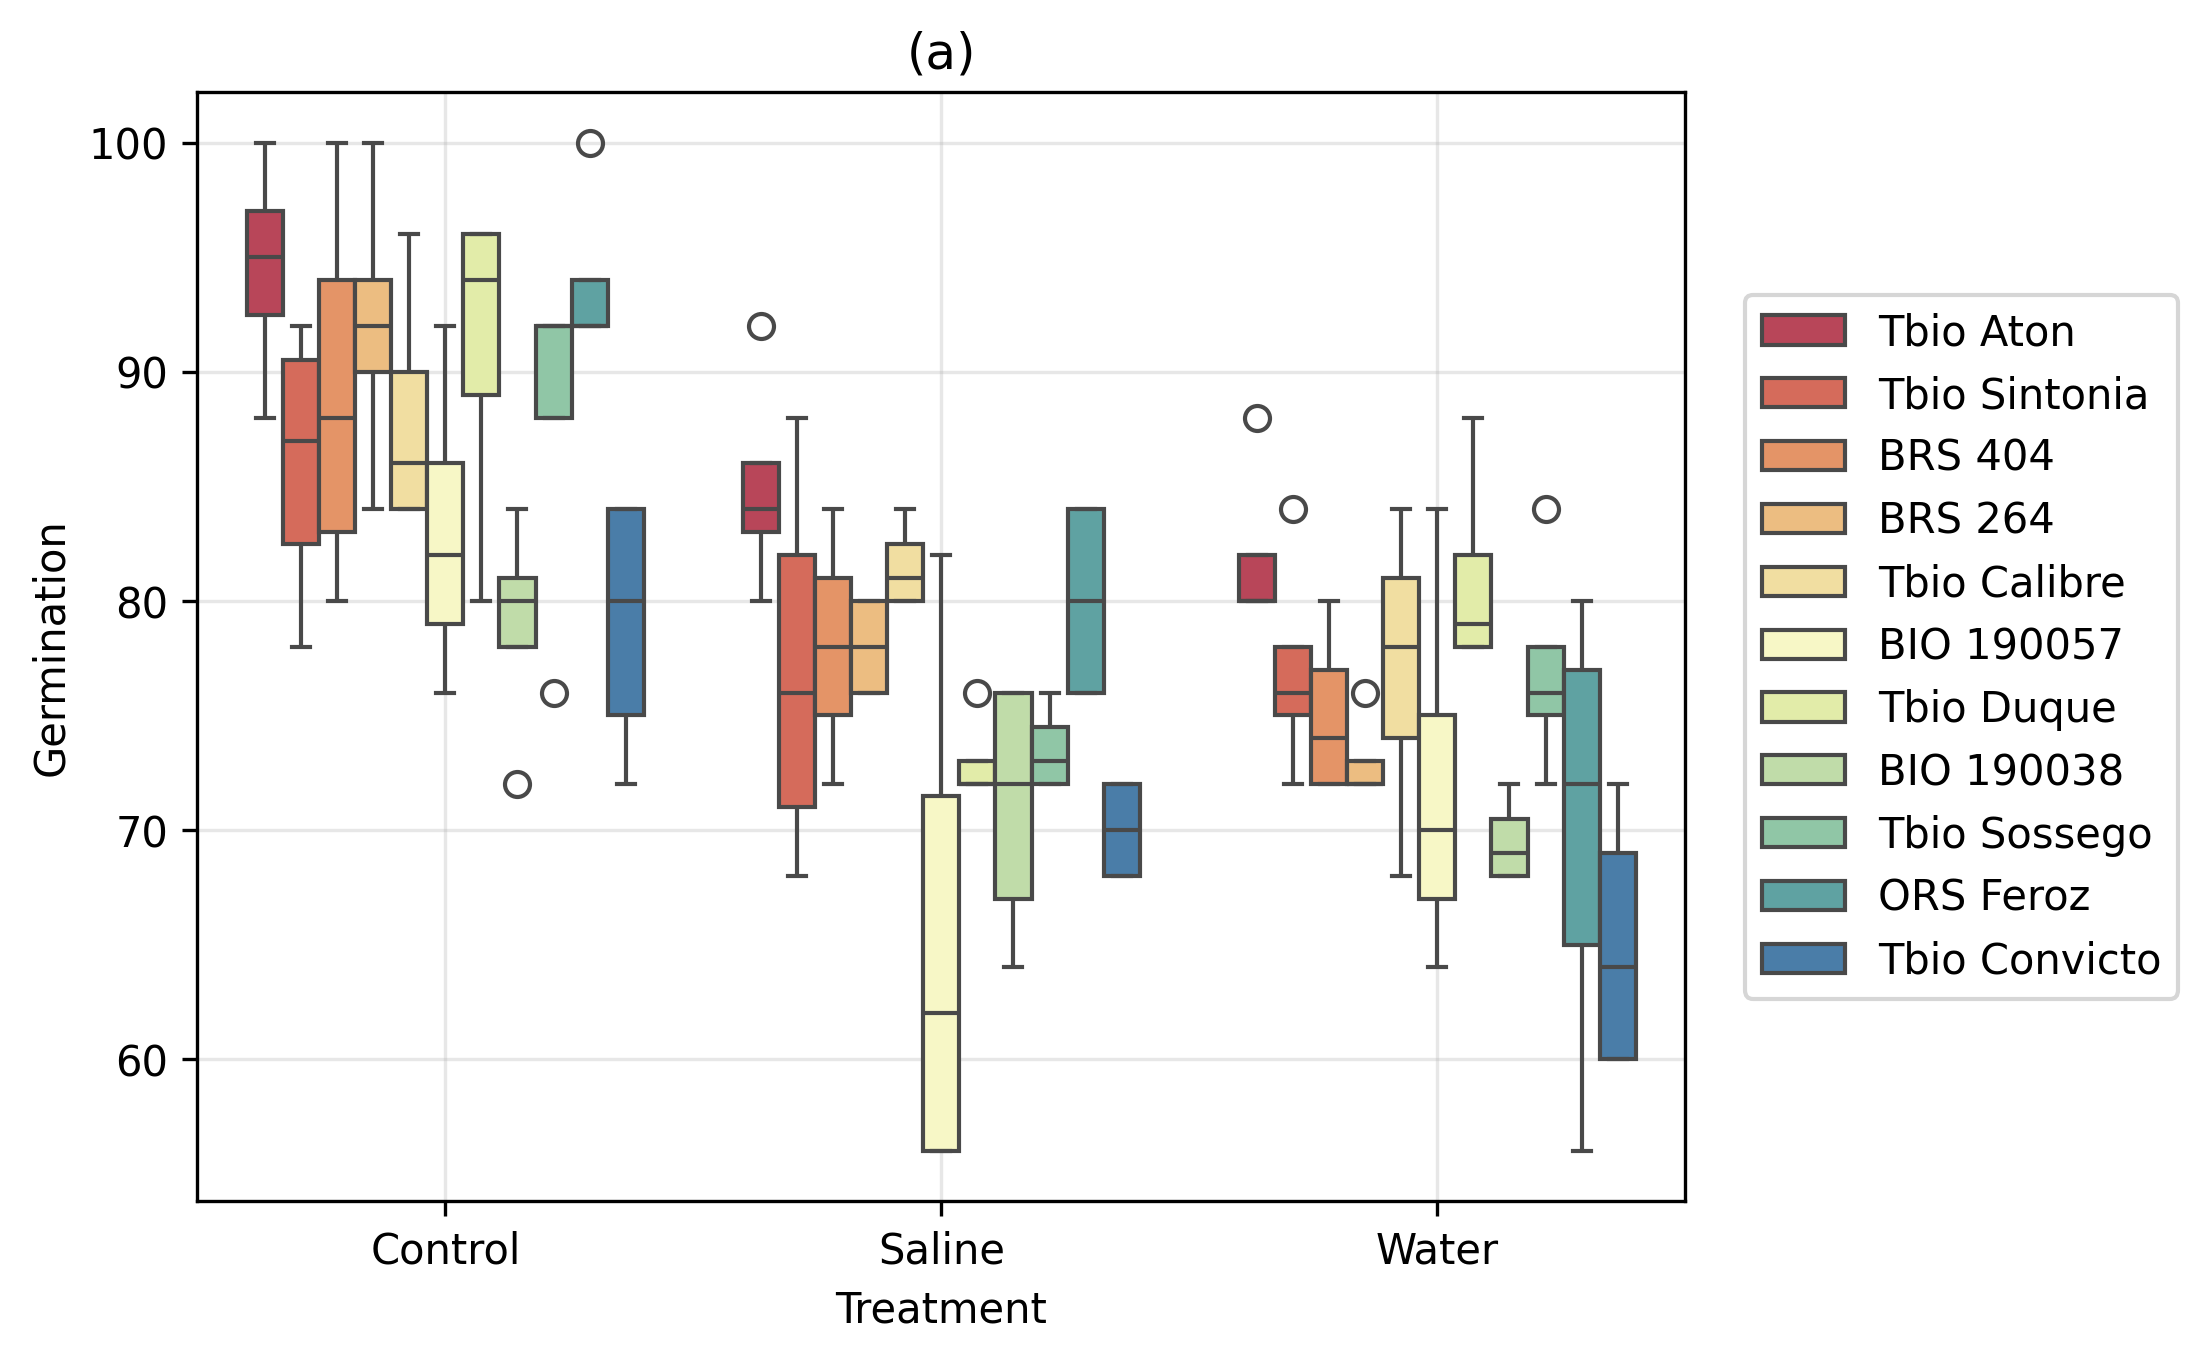

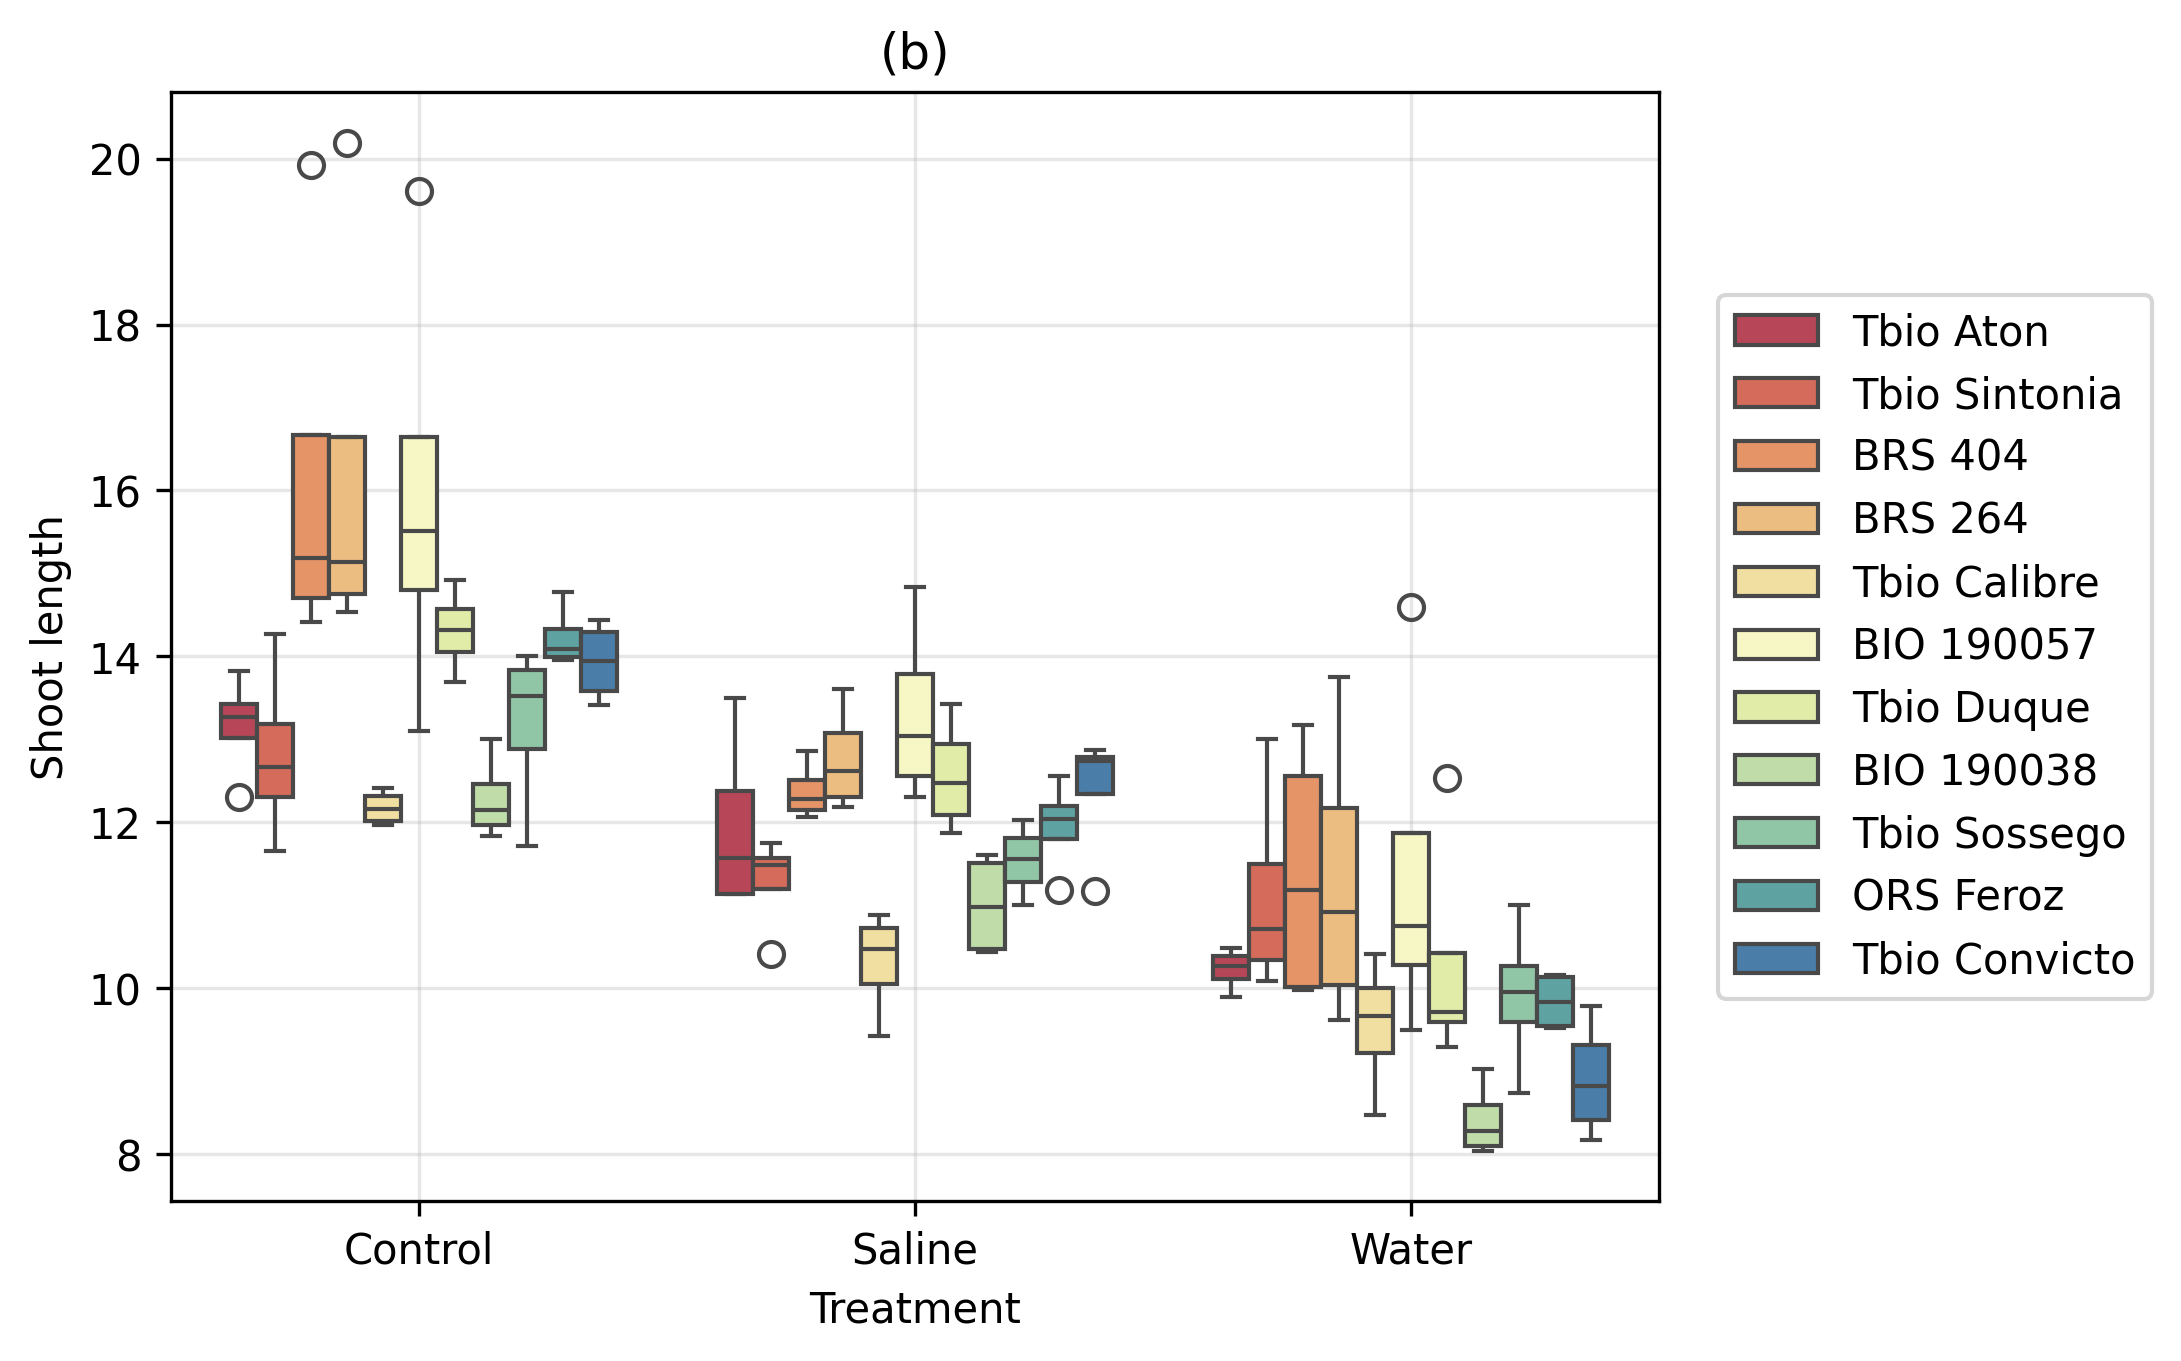

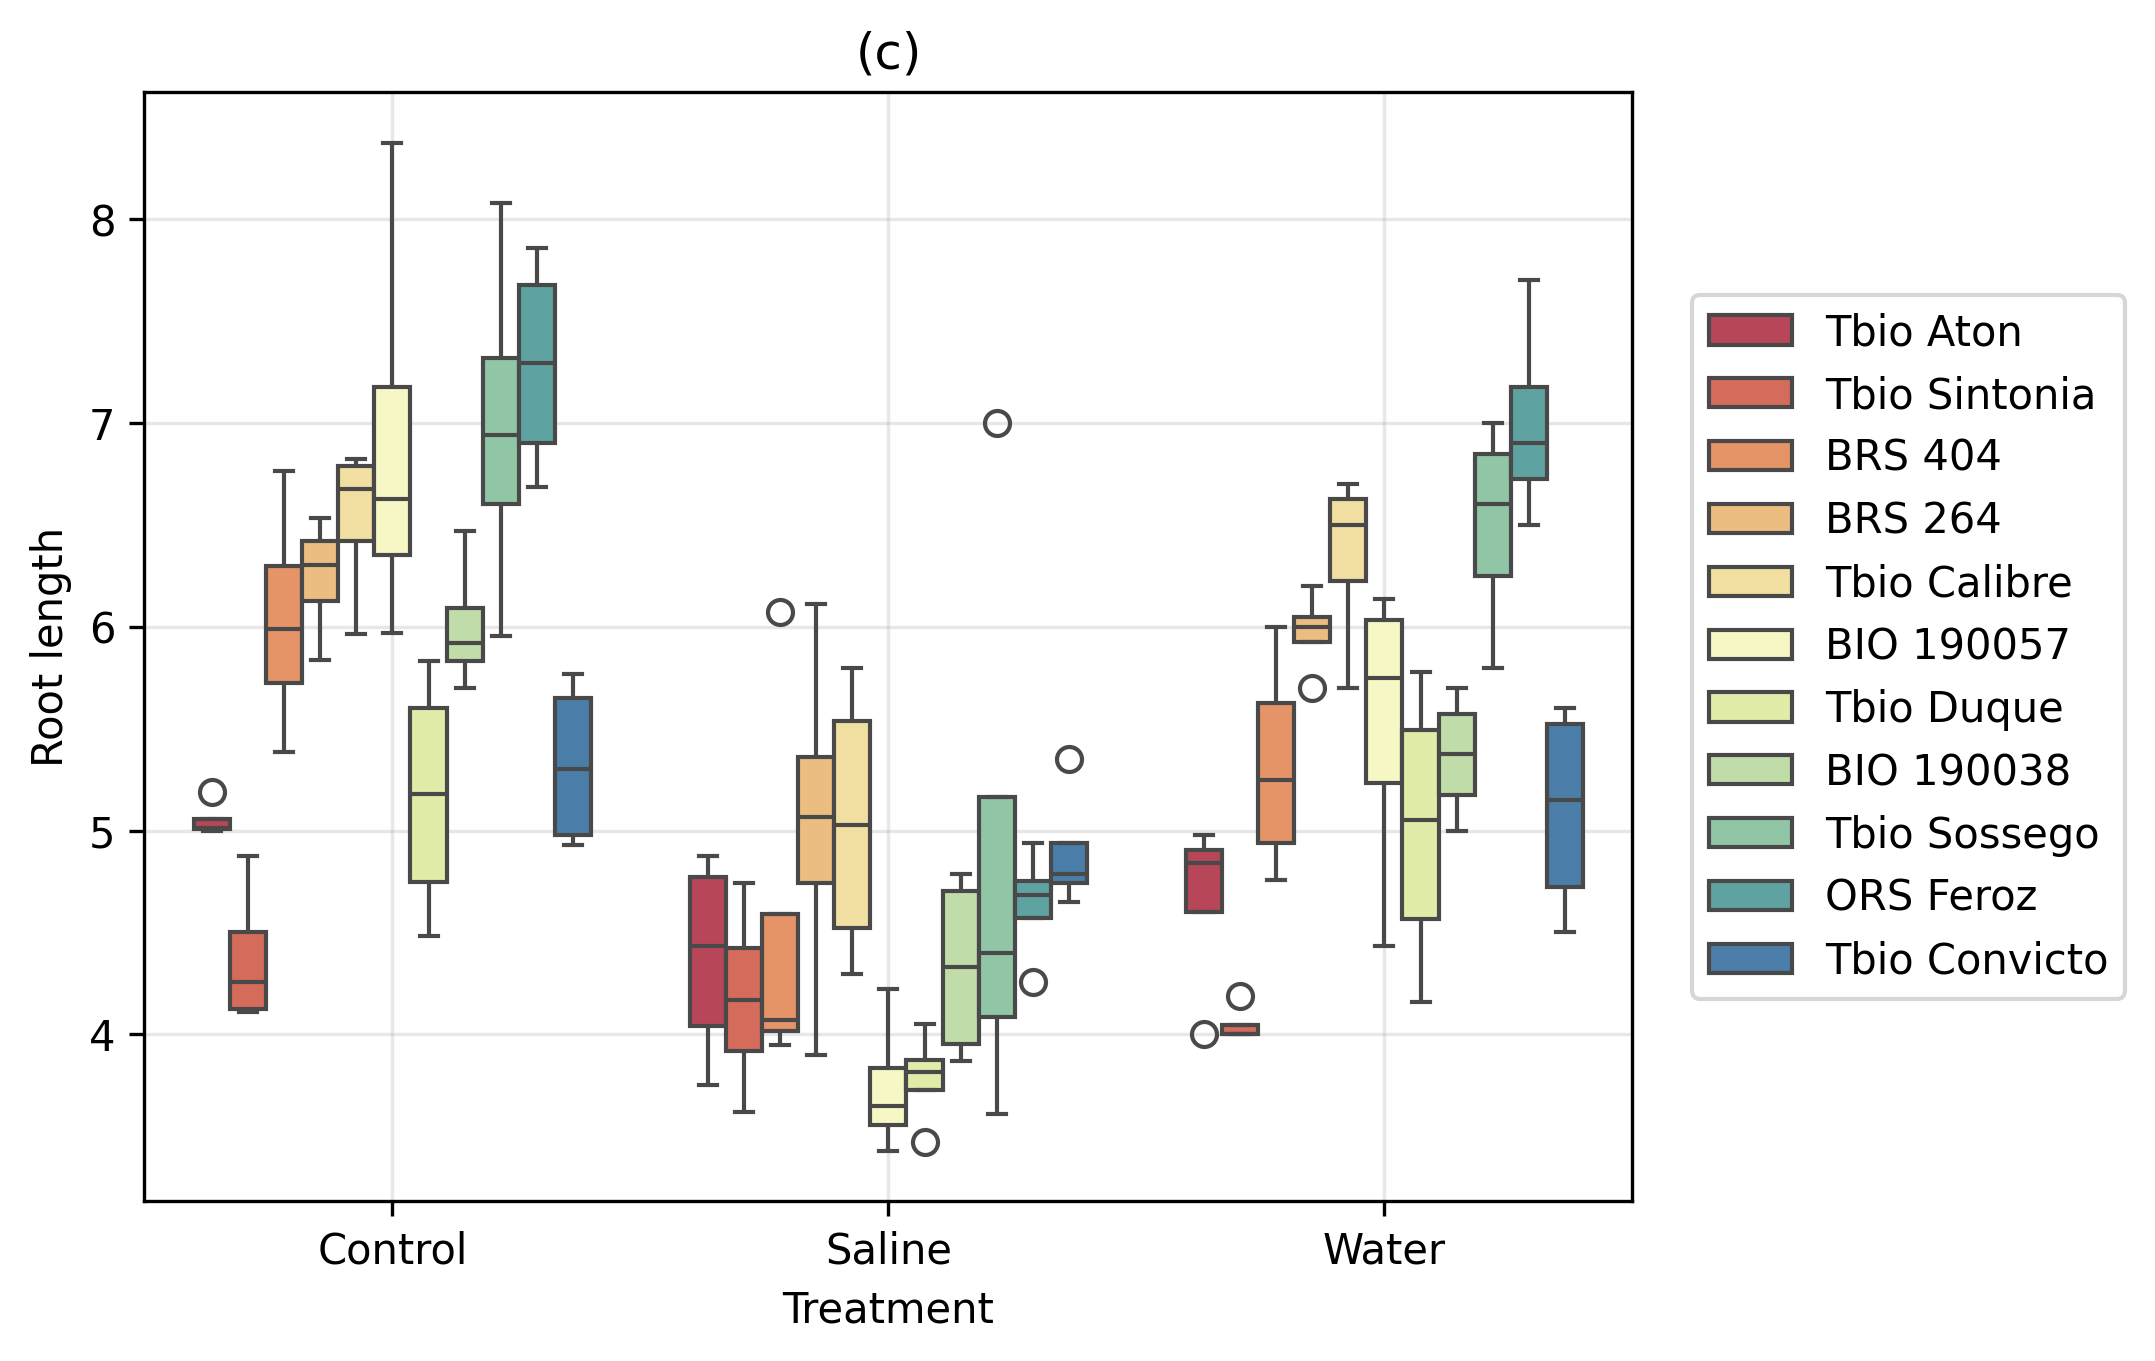

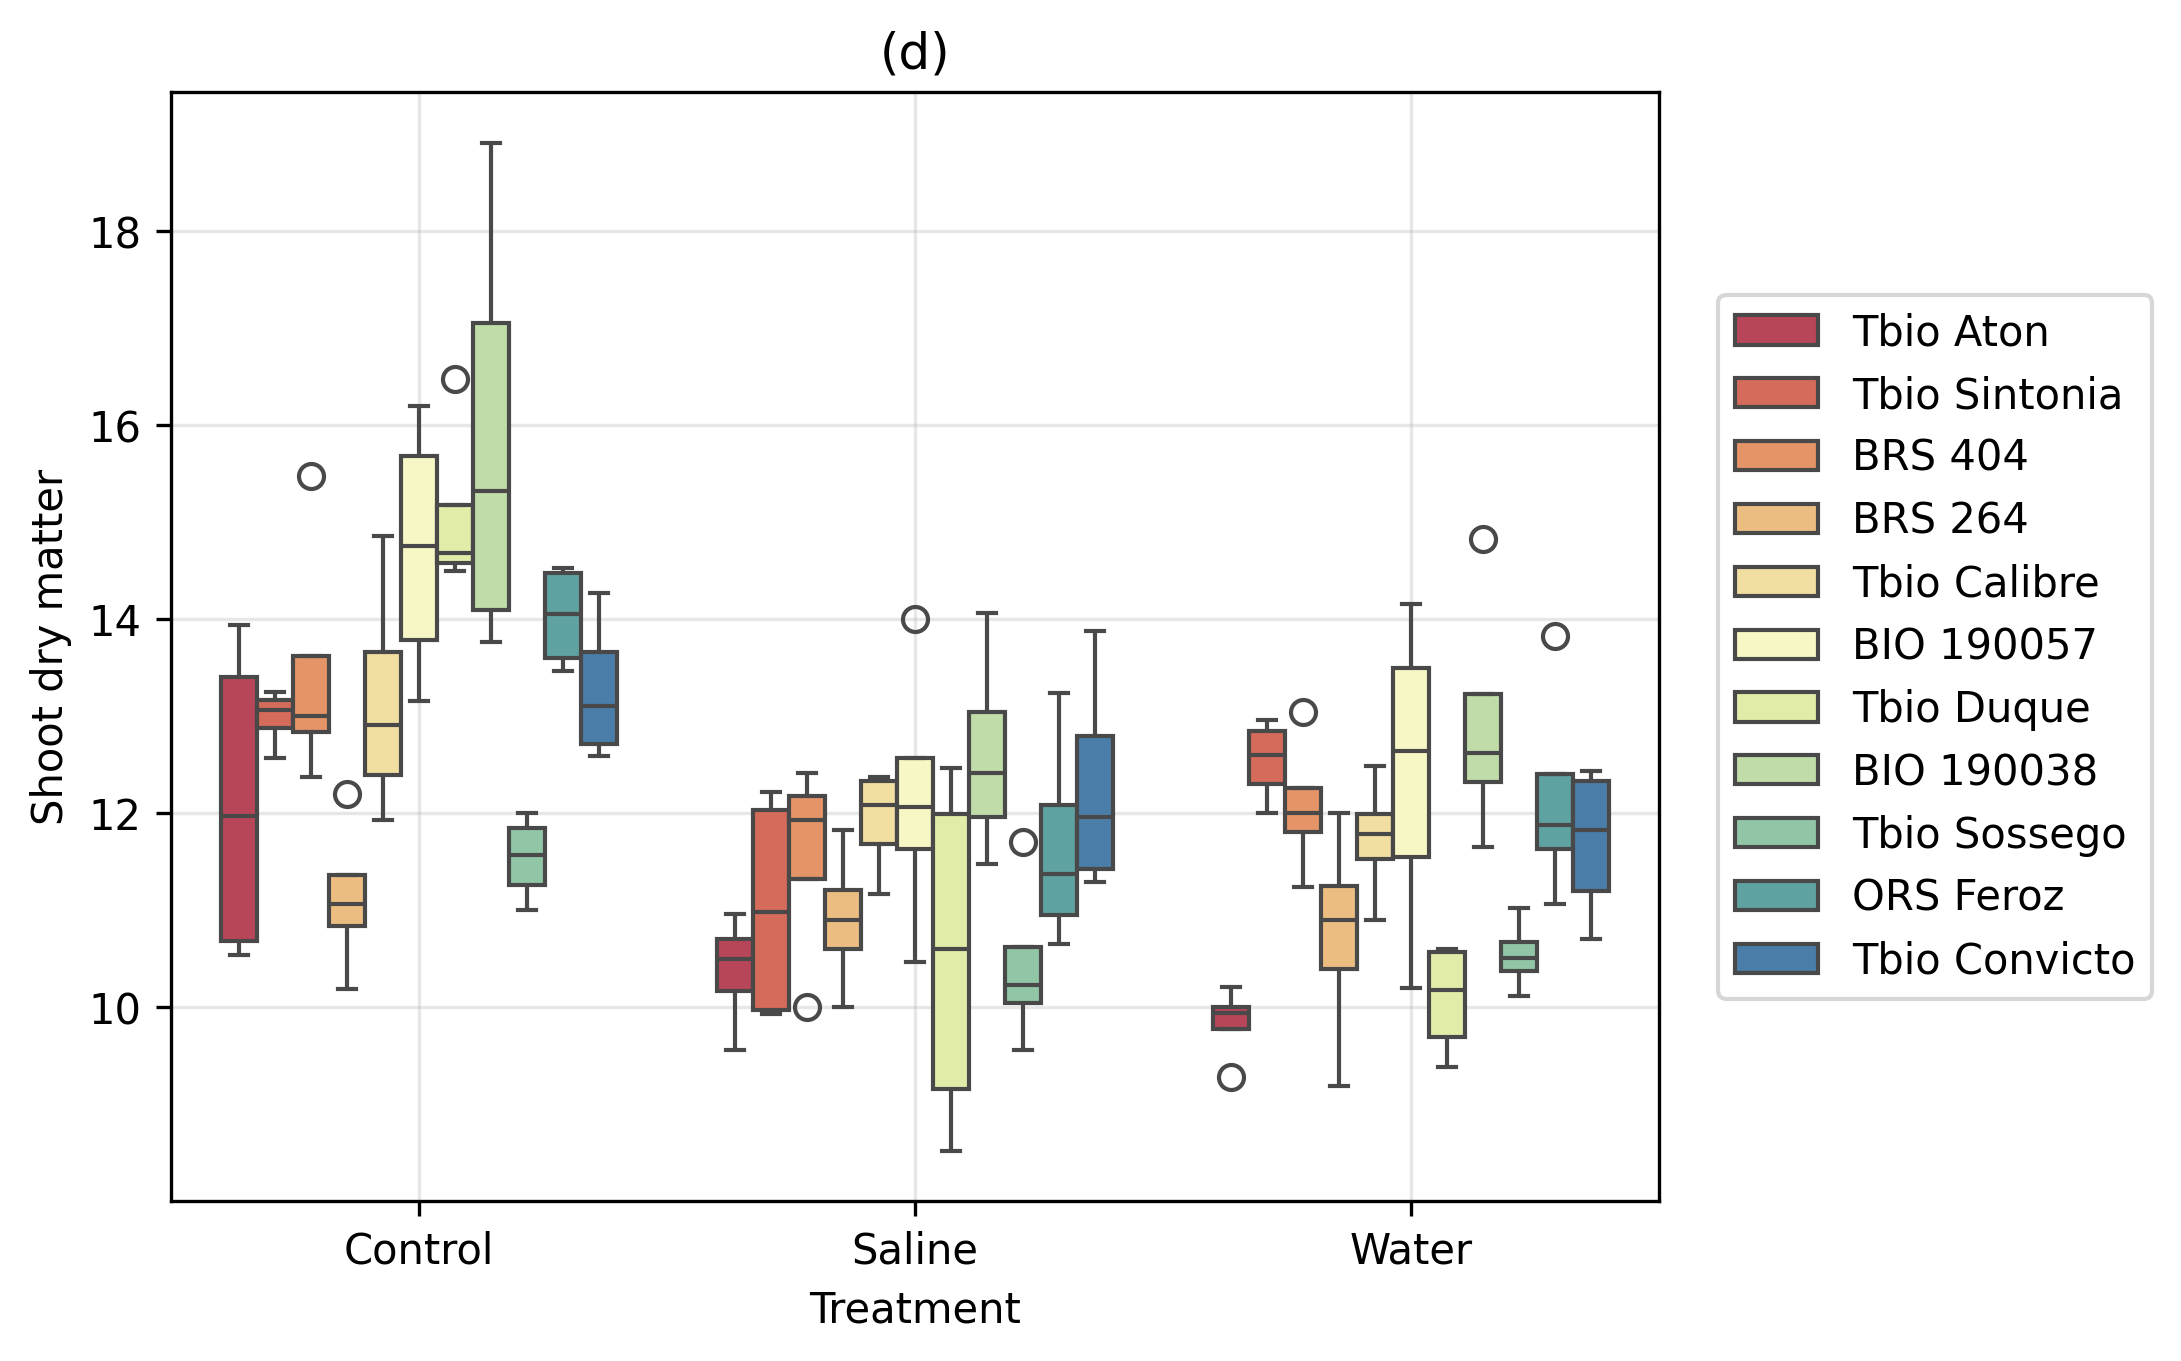

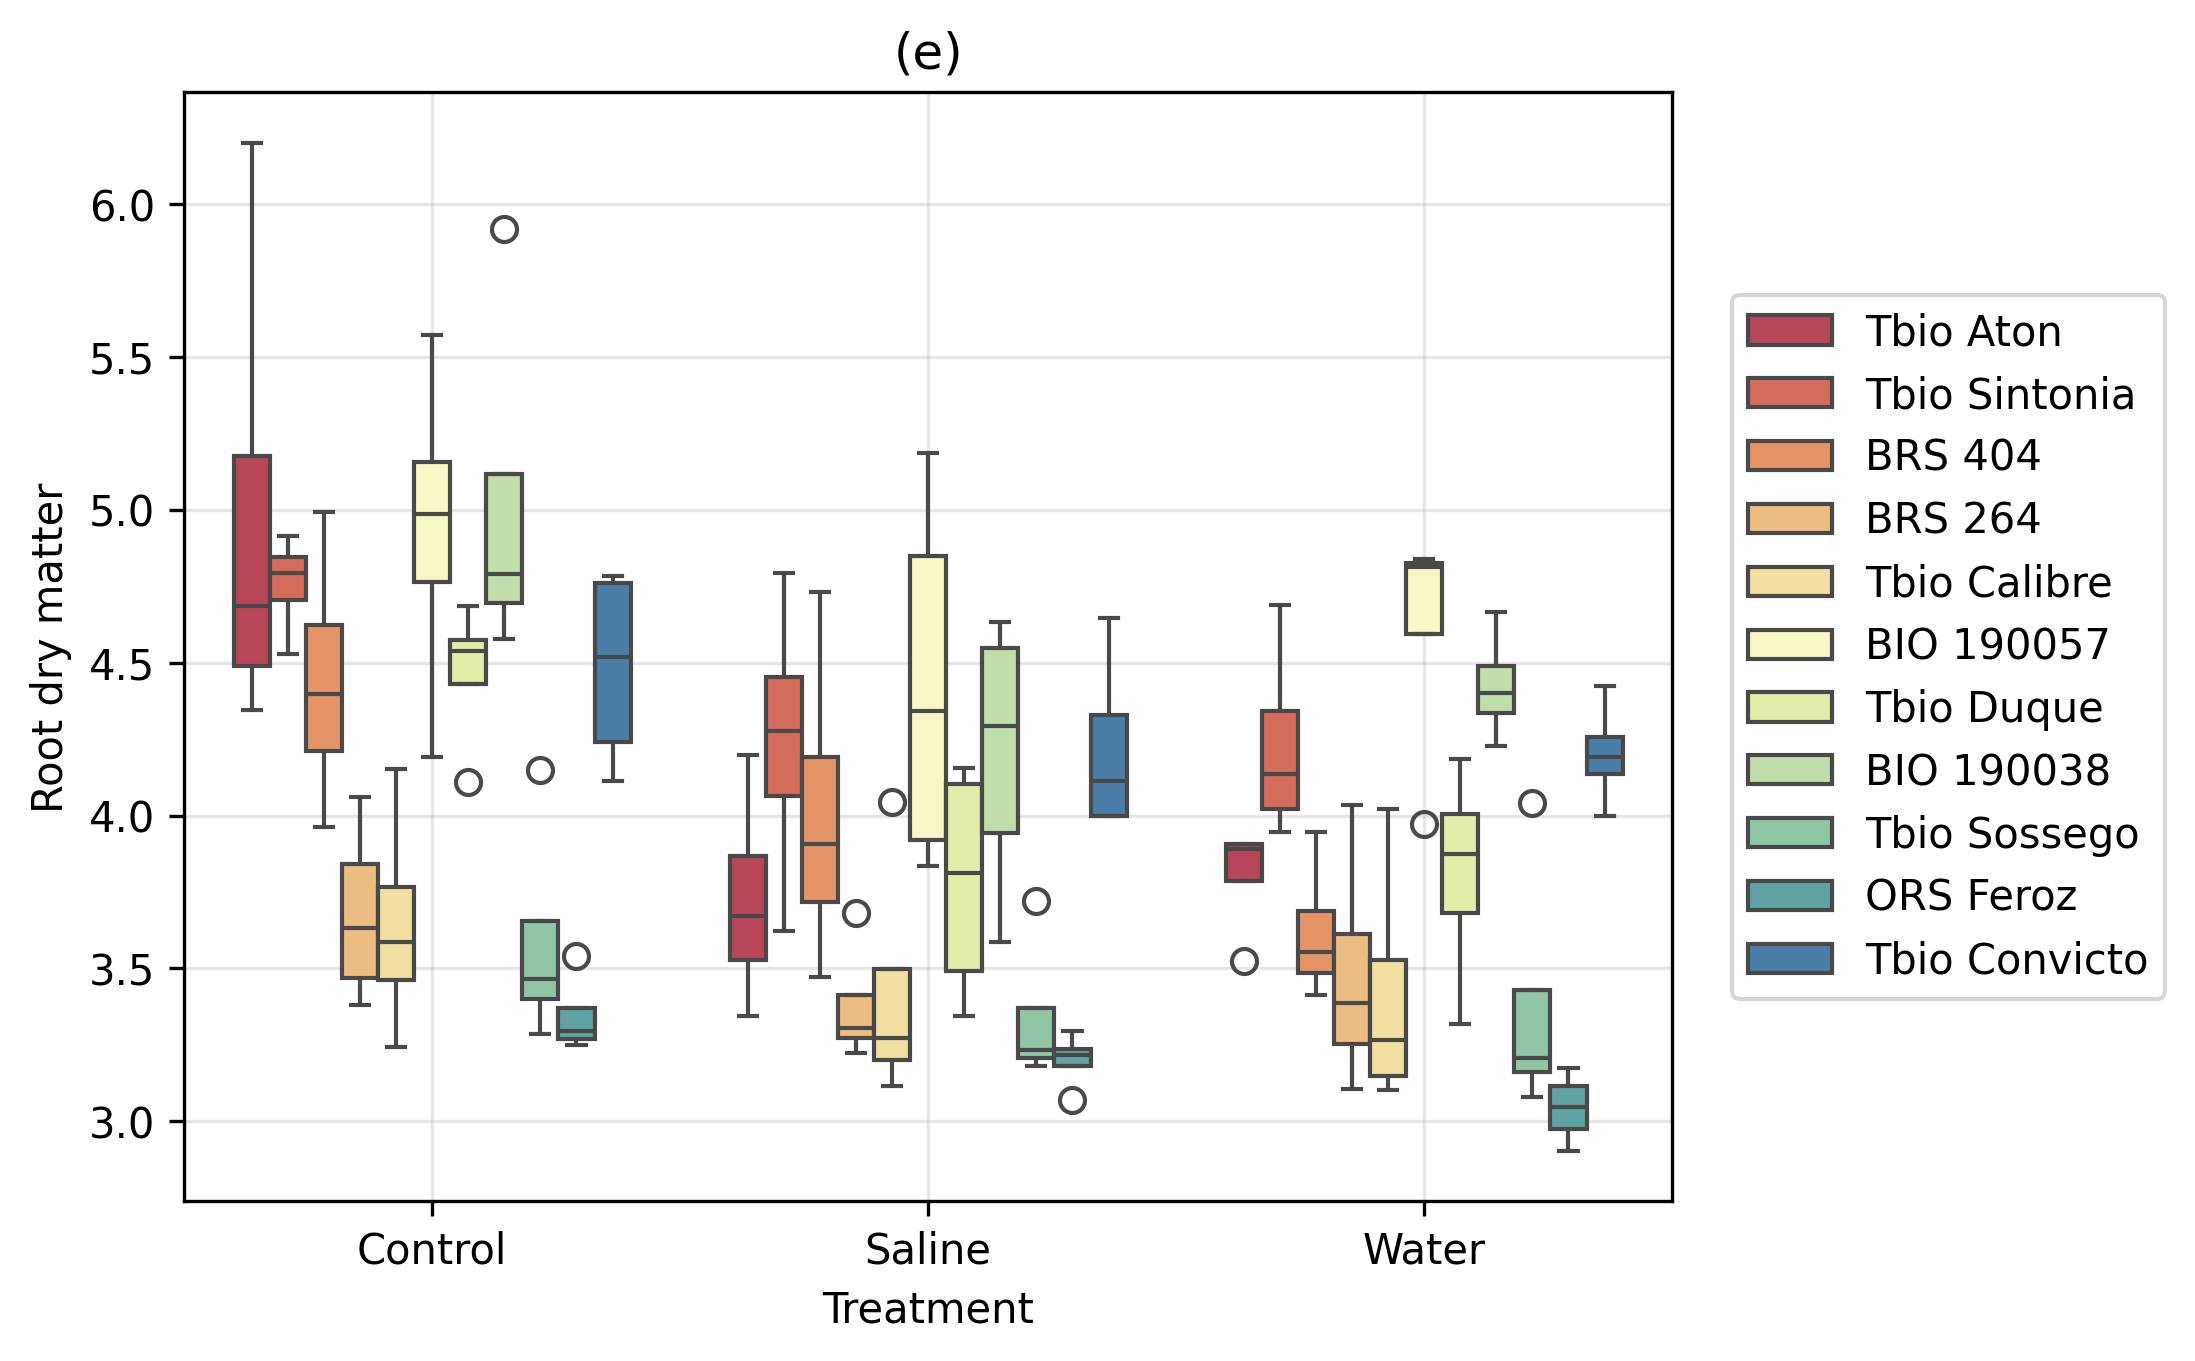

In [ ]:
labels = ['a','b','c','d','e']

for i, col in enumerate(df.columns):
    plt.figure(dpi=300)
    sns.boxplot(x='Treatment', y=col, hue='Cultivar', data=df_all, palette='Spectral')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    plt.title('(' + labels[i] + ')')
    plt.grid(alpha=0.3)
    plt.show()

## Tune the hyper-parameters

In [ ]:
'''
Check the best hyper parameters
Extracted cross-validation was used to prevent a sample of the same genotype from being in both the training set and the test set.
'''
param_grid = {"max_depth": [1, 2, 5, 10, None],
              "max_features": [1, 3, 5],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [900, 1000, 1200]}

group_kfold = GroupKFold(n_splits=5)

K = 1
for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')
  clf.fit(X_train, y_train)

  print(clf.best_params_)
  print(clf.best_score_)

  K = K + 1

Fold 1
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'n_estimators': 1200}
0.8742105263157894
Fold 2
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 1, 'n_estimators': 900}
0.825974025974026
Fold 3
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'n_estimators': 1000}
0.8528138528138529
Fold 4
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'n_estimators': 1000}
0.8251082251082252
Fold 5
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 1, 'n_estimators': 900}
0.8341991341991342


## Training and test the classification model with the better hyper-parameters

In [ ]:
'''
Random Forest with fixed parameter, over 10-fold, using the measures of accuracy, precision and recall and confusion matrix
Best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'n_estimators': 80}
'''
K = 1

importances = []

acc_train = []
acc_test  = []

pr_train = []
pr_test  = []

re_train = []
re_test  = []

mc_train = []
mc_test  = []

oob_score = []

train_indices = []
test_indices  = []

# n_splits was fixed equal to 11 to used all groups in the step test
group_kfold = GroupKFold(n_splits=11)

for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = RandomForestClassifier(bootstrap=True,
                               criterion='entropy',
                               max_depth=2,
                               n_estimators=1200,
                               max_features=1,
                               oob_score=True,
                               random_state=0)
  clf.fit(X_train, y_train)

  oob_score.append(clf.oob_score_)

  y_pred_train = clf.predict(X_train)
  y_pred_test  = clf.predict(X_test)

  importances.append(clf.feature_importances_)

  r_acc_train = accuracy_score(y_train, y_pred_train)
  r_acc_test  = accuracy_score(y_test, y_pred_test)
  acc_train.append(r_acc_train)
  acc_test.append(r_acc_test )

  r_pr_train = precision_score(y_train, y_pred_train, average='weighted')
  r_pr_test  = precision_score(y_test, y_pred_test, average='weighted')
  pr_train.append(r_pr_train)
  pr_test.append(r_pr_test)

  r_re_train = recall_score(y_train, y_pred_train, average='weighted')
  r_re_test  = recall_score(y_test, y_pred_test, average='weighted')
  re_train.append(r_re_train)
  re_test.append(r_re_test)

  r_mc_train = confusion_matrix(y_train, y_pred_train)
  r_mc_test  = confusion_matrix(y_test, y_pred_test)
  mc_train.append(r_mc_train)
  mc_test.append(r_mc_test)

  print('OOB Score: %.4f' %clf.oob_score_)
  print('\t Training: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_train, r_pr_train, r_re_train))
  print('\t Importances: ', clf.feature_importances_)
  print('\t Test: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_test, r_pr_test, r_re_test))

  K = K + 1

acc_train = np.array(acc_train)
acc_test  = np.array(acc_test)

pr_train = np.array(pr_train)
pr_test  = np.array(pr_test)

re_train = np.array(re_train)
re_test  = np.array(re_test)

mc_train = np.array(mc_train)
mc_test  = np.array(mc_test )

oob_score = np.array(oob_score)

print('\n')
print('Average - Training')
print('\t OOB Score: %.4f +- %.4f' %(oob_score.mean(), oob_score.std()) )
print('\t Acc: %.4f +- %.4f | Pr: %.4f +- %.4f | Re: %.4f +- %.4f' %(acc_train.mean(), acc_train.std(), pr_train.mean(), pr_train.std(), re_train.mean(), re_train.std()))
print('Average - Test')
print('\t Acc: %.4f +- %.4f | Pr: %.4f +- %.4f | Re: %.4f +- %.4f' %(acc_test.mean(), acc_test.std(), pr_test.mean(), pr_test.std(), re_test.mean(), re_test.std()))

Fold 1
OOB Score: 0.8083
	 Training: 
	 Acc: 0.9000 - Pr: 0.8989 - Re: 0.9000
	 Importances:  [0.21624281 0.27203293 0.19142197 0.18636418 0.1339381 ]
	 Test: 
	 Acc: 0.9167 - Pr: 0.9333 - Re: 0.9167
Fold 2
OOB Score: 0.8500
	 Training: 
	 Acc: 0.9250 - Pr: 0.9248 - Re: 0.9250
	 Importances:  [0.21941684 0.2716049  0.21798654 0.16769639 0.12329532]
	 Test: 
	 Acc: 0.6667 - Pr: 0.8333 - Re: 0.6667
Fold 3
OOB Score: 0.8083
	 Training: 
	 Acc: 0.9167 - Pr: 0.9162 - Re: 0.9167
	 Importances:  [0.21938362 0.27606127 0.20675466 0.16224218 0.13555827]
	 Test: 
	 Acc: 0.9167 - Pr: 0.9333 - Re: 0.9167
Fold 4
OOB Score: 0.8000
	 Training: 
	 Acc: 0.9083 - Pr: 0.9083 - Re: 0.9083
	 Importances:  [0.23276057 0.26472989 0.19959671 0.16856369 0.13434915]
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 5
OOB Score: 0.8250
	 Training: 
	 Acc: 0.9333 - Pr: 0.9355 - Re: 0.9333
	 Importances:  [0.22180693 0.27666553 0.19950287 0.16925105 0.13277362]
	 Test: 
	 Acc: 0.7500 - Pr: 0.8571 - Re: 0.7500


## Show the performance metrics

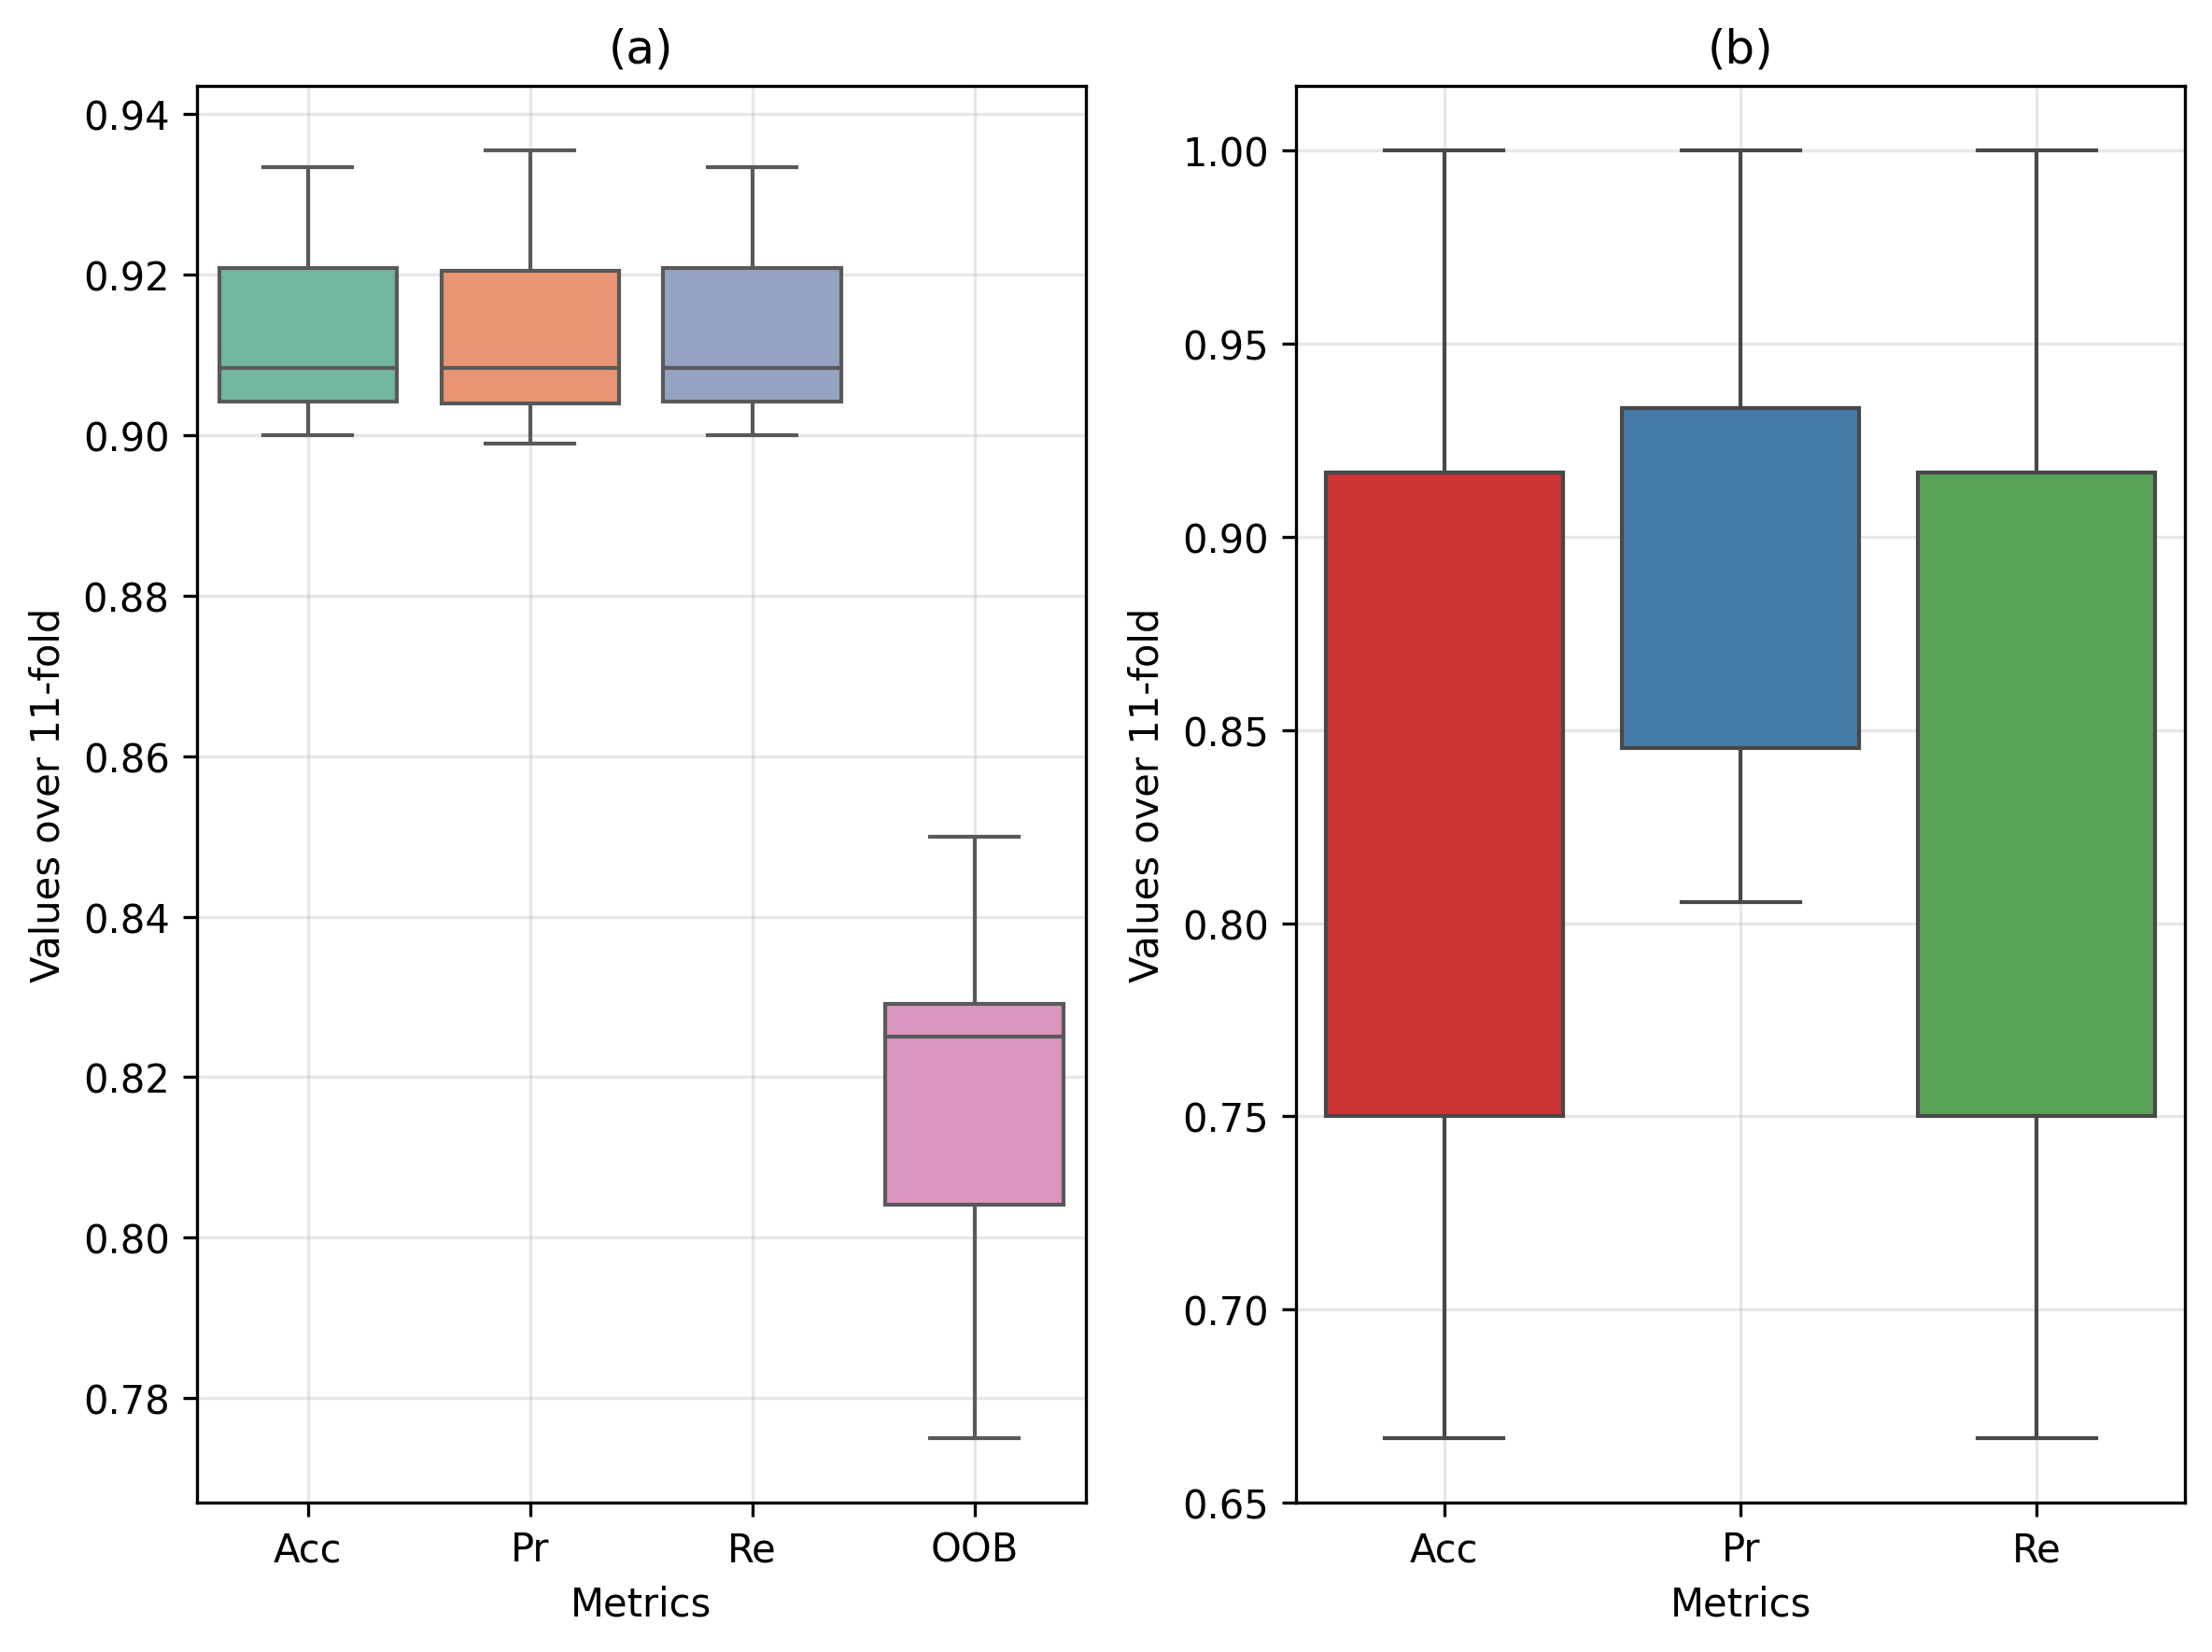

In [ ]:
# ML model results
df_train = pd.DataFrame()
df_train['Acc'] = acc_train
df_train['Pr']  = pr_train
df_train['Re']  = re_train
df_train['OOB'] = oob_score

df_test = pd.DataFrame()
df_test['Acc'] = acc_test
df_test['Pr']  = pr_test
df_test['Re']  = re_test

plt.figure(dpi=300, figsize=(8,6))
plt.subplot(121)
plt.title('(a)')
sns.boxplot(data=df_train, palette="Set2")
plt.grid(alpha=0.3)
#plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 11-fold')
plt.subplot(122)
plt.title('(b)')
sns.boxplot(data=df_test, palette="Set1")
#plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 11-fold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Show feature importance

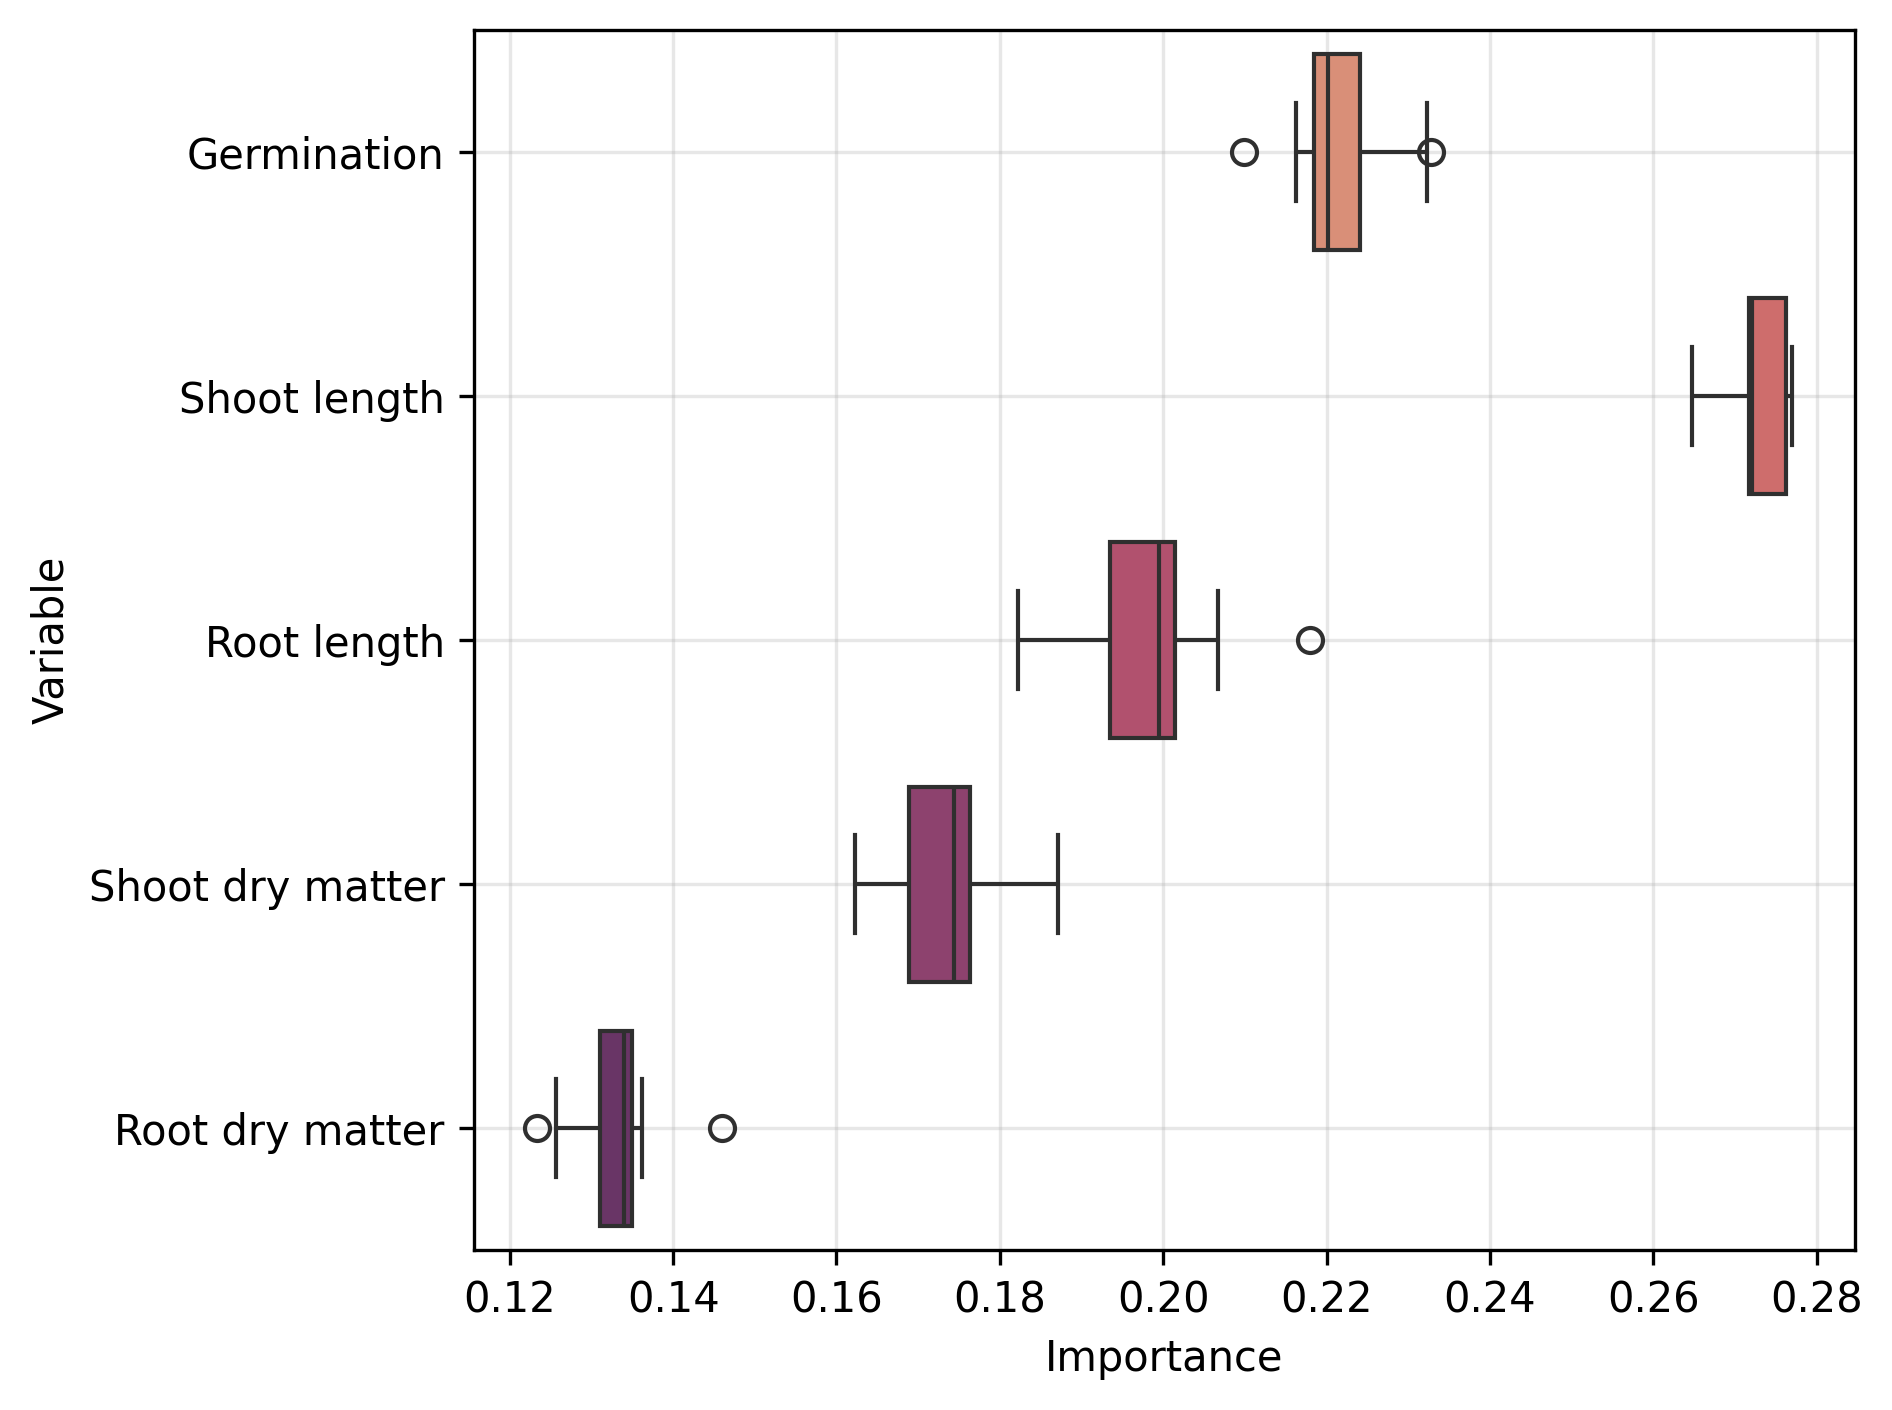

,Germination,Shoot length,Root length,Shoot dry matter,Root dry matter
0,0.216243,0.272033,0.191422,0.186364,0.133938
1,0.219417,0.271605,0.217987,0.167696,0.123295
2,0.219384,0.276061,0.206755,0.162242,0.135558
3,0.232761,0.264730,0.199597,0.168564,0.134349
4,0.221807,0.276666,0.199503,0.169251,0.132774
5,0.226458,0.269808,0.201757,0.176302,0.125674
6,0.220176,0.276557,0.195523,0.171559,0.136184
7,0.217599,0.276966,0.199165,0.174436,0.131835
8,0.209837,0.271773,0.201163,0.187068,0.130159
9,0.221376,0.274834,0.182265,0.175536,0.145989


In [ ]:
# Feature importance
importances = np.array(importances)
df_imp = pd.DataFrame()
df_imp['Germination']     = importances[:,0]
df_imp['Shoot length']    = importances[:,1]
df_imp['Root length']     = importances[:,2]
df_imp['Shoot dry matter']  = importances[:,3]
df_imp['Root dry matter']   = importances[:,4]

Weights_for_distances = df_imp.mean()

plt.figure(dpi=300)
sns.boxplot(data=df_imp, palette="flare", orient='h')
plt.ylabel('Variable')
plt.xlabel('Importance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

display(df_imp)

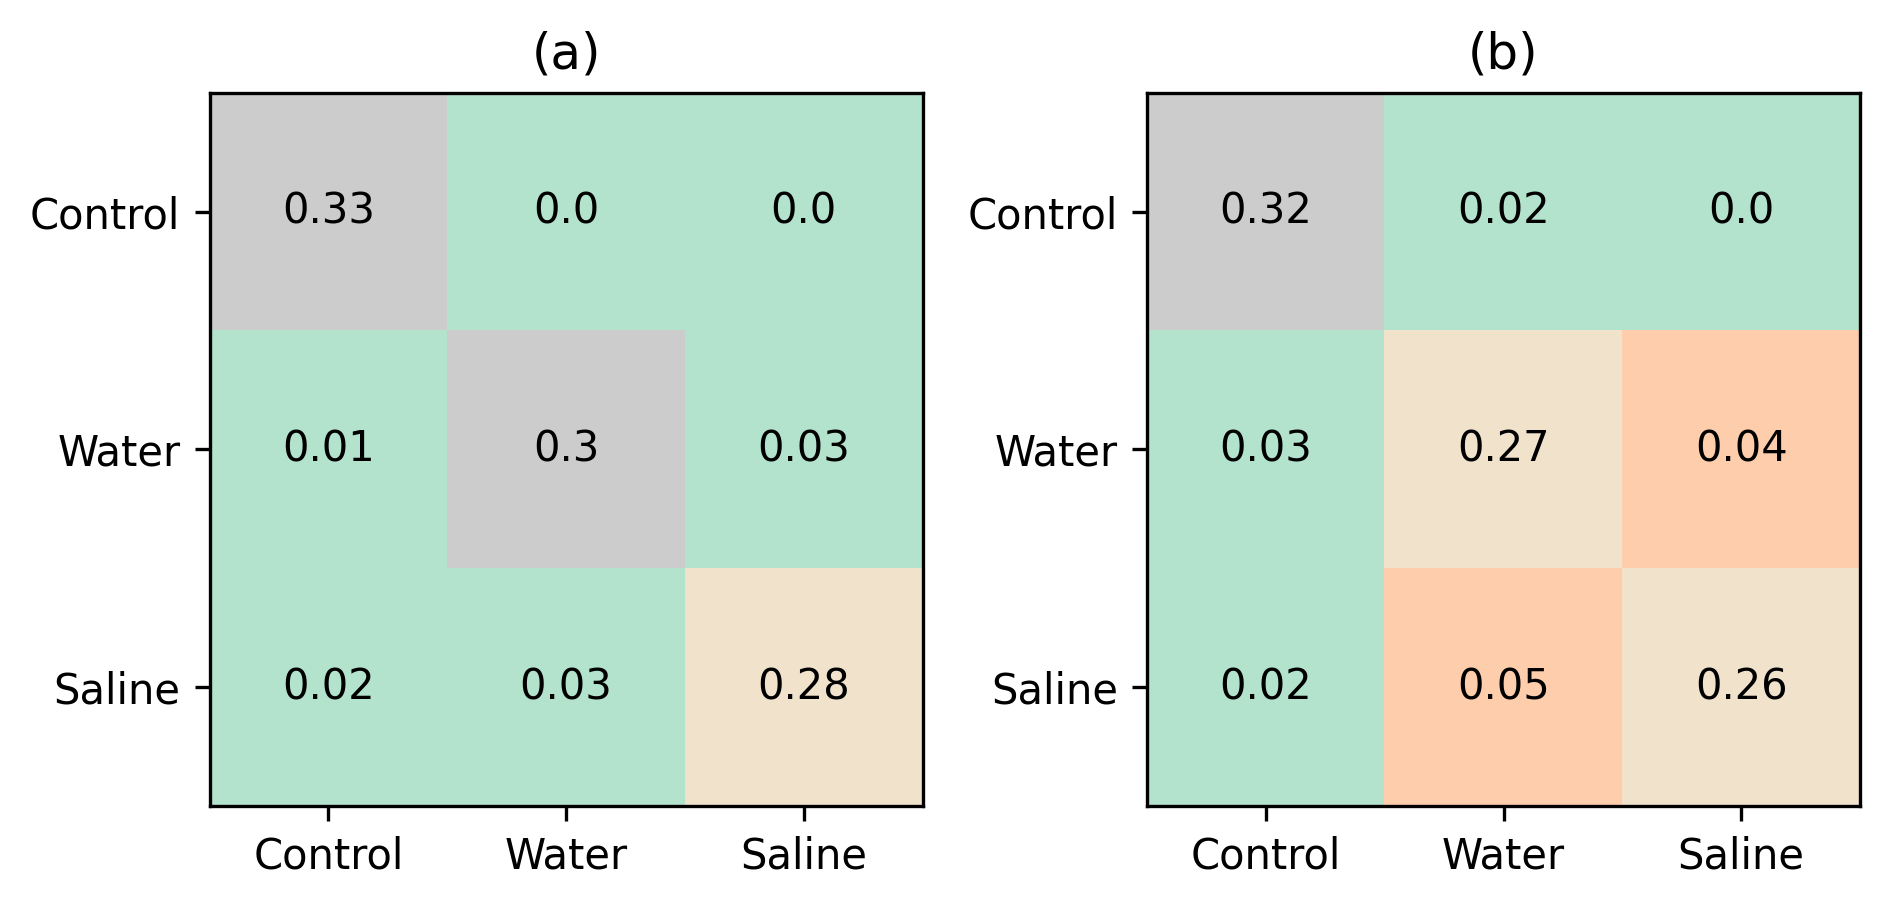

In [ ]:
'''
Plot the average confusion matrix
'''
classes = ["Control", "Water", "Saline"]

MC_train = np.round(np.mean(mc_train, axis=0)/X_train.shape[0], 2)
MC_test  = np.round(np.mean(mc_test, axis=0)/X_test.shape[0], 2)

fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(MC_train, cmap='Pastel2')
plt.title('(a)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_train[k, j], ha="center", va="center", color="k")

plt.subplot(122)
plt.imshow(MC_test, cmap='Pastel2')
plt.title('(b)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_test[k, j], ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

# STEP 2: Selection

# Calculates the distance of samples in the control relative to the stress treatments

## For each repetition

In [ ]:
# Calculates the weighted Manhattan distance
# Weighting is performed by the importance of the variables provided by Random Forest
def w_dist(w, v1, v2):
    return np.sum(w * np.abs(v1 - v2))

# Normalizes the variables weight
Weights_for_distances = Weights_for_distances / np.linalg.norm(Weights_for_distances, 1)

# Creates a new dataframe for distance calculation
df_all_treatment = df_all.copy()

df_all_treatment_control = df_all_treatment[df_all_treatment['Treatment'] == 'Control']
df_all_treatment_water   = df_all_treatment[df_all_treatment['Treatment'] == 'Water']
df_all_treatment_saline  = df_all_treatment[df_all_treatment['Treatment'] == 'Saline']

del df_all_treatment_control['Treatment']
del df_all_treatment_water['Treatment']
del df_all_treatment_saline['Treatment']

distances = []
cultivars = np.unique(Cultivar)

# Calculate the distances for each Repetition
for Rep in np.arange(1, 5):

    df_all_treatment_control_rep = df_all_treatment_control[df_all_treatment_control['Repetition'] == Rep]
    df_all_treatment_water_rep   = df_all_treatment_water[df_all_treatment_water['Repetition'] == Rep]
    df_all_treatment_saline_rep  = df_all_treatment_saline[df_all_treatment_saline['Repetition'] == Rep]

    del df_all_treatment_control_rep['Repetition']
    del df_all_treatment_water_rep['Repetition']
    del df_all_treatment_saline_rep['Repetition']

    distances_rep = []

    for cultivar in cultivars:

        cultivar_control = df_all_treatment_control_rep[df_all_treatment_control_rep['Cultivar'] == cultivar]
        cultivar_water   = df_all_treatment_water_rep[df_all_treatment_water_rep['Cultivar'] == cultivar]
        cultivar_saline  = df_all_treatment_saline_rep[df_all_treatment_saline_rep['Cultivar'] == cultivar]

        del cultivar_control['Cultivar']
        del cultivar_water['Cultivar']
        del cultivar_saline['Cultivar']

        cultivar_control = np.array(cultivar_control)
        cultivar_water   = np.array(cultivar_water)
        cultivar_saline  = np.array(cultivar_saline)

        d1 = w_dist(np.array(Weights_for_distances), cultivar_water, cultivar_control)
        d2 = w_dist(np.array(Weights_for_distances), cultivar_saline, cultivar_control)

        distances_rep.append([d1, d2])

    distances.append(distances_rep)

# Convert to array
distances = np.array(distances)

# Dataframe for distances
df_distances = pd.DataFrame(distances.reshape(-1, 2), columns=['Water', 'Saline'])
df_distances['Cultivar'] = np.tile(cultivars, 4)
df_distances['Repetition'] = np.repeat(np.arange(1, 5), len(cultivars))
display(df_distances)

,Water,Saline,Cultivar,Repetition
0,5.274809,3.392914,BIO 190038,1
1,6.591145,7.281092,BIO 190057,1
2,5.105064,3.464050,BRS 264,1
3,3.265822,2.464663,BRS 404,1
4,5.319287,5.415343,ORS Feroz,1
5,5.694451,5.480800,Tbio Aton,1
6,4.576113,1.635364,Tbio Calibre,1
7,7.303731,3.319158,Tbio Convicto,1
8,4.506275,7.691260,Tbio Duque,1
9,5.372037,5.119244,Tbio Sintonia,1


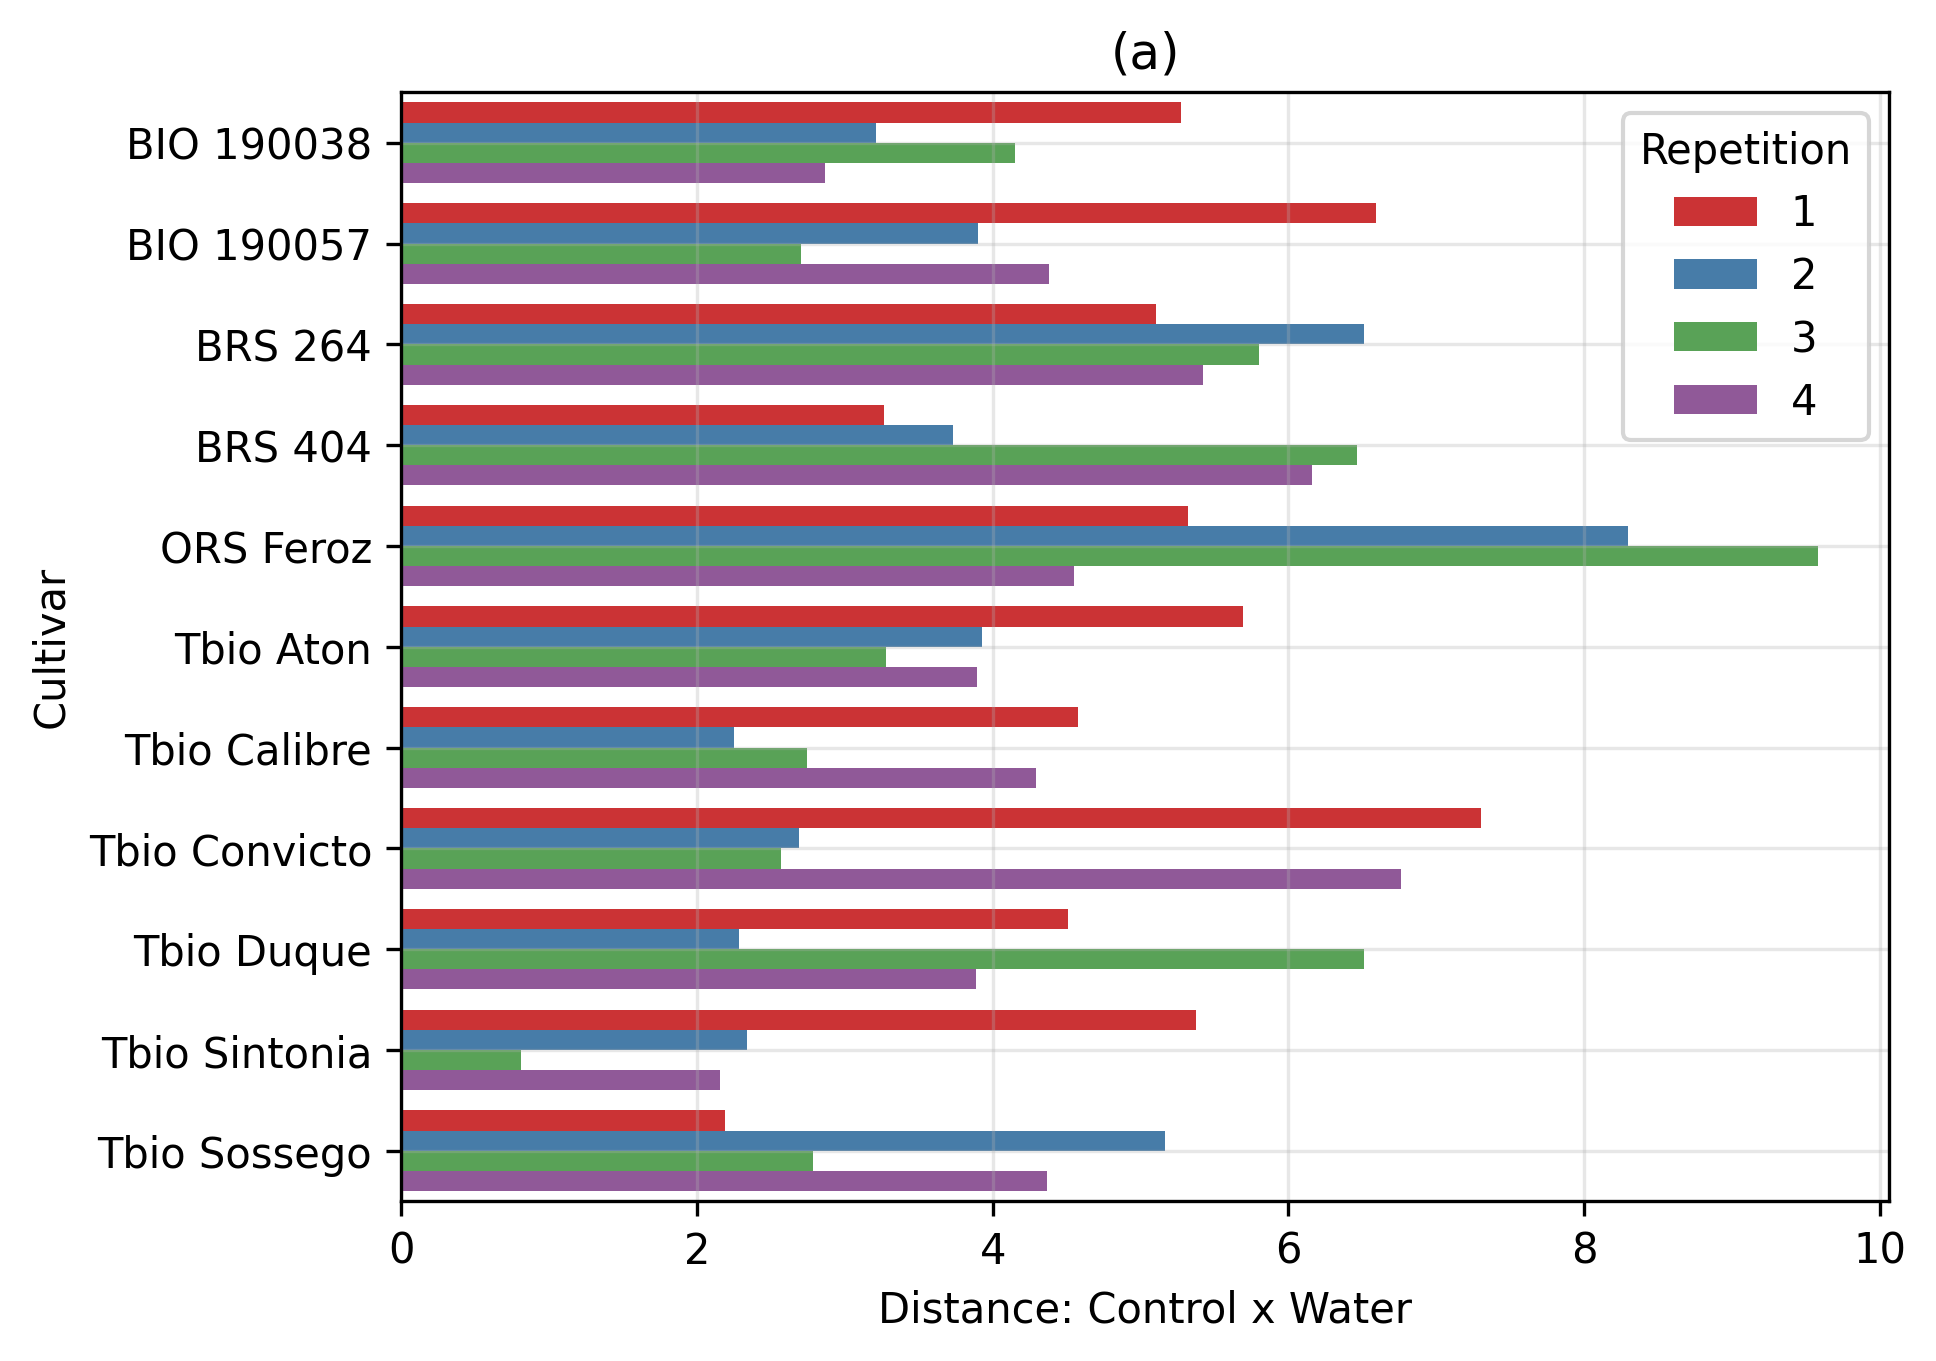

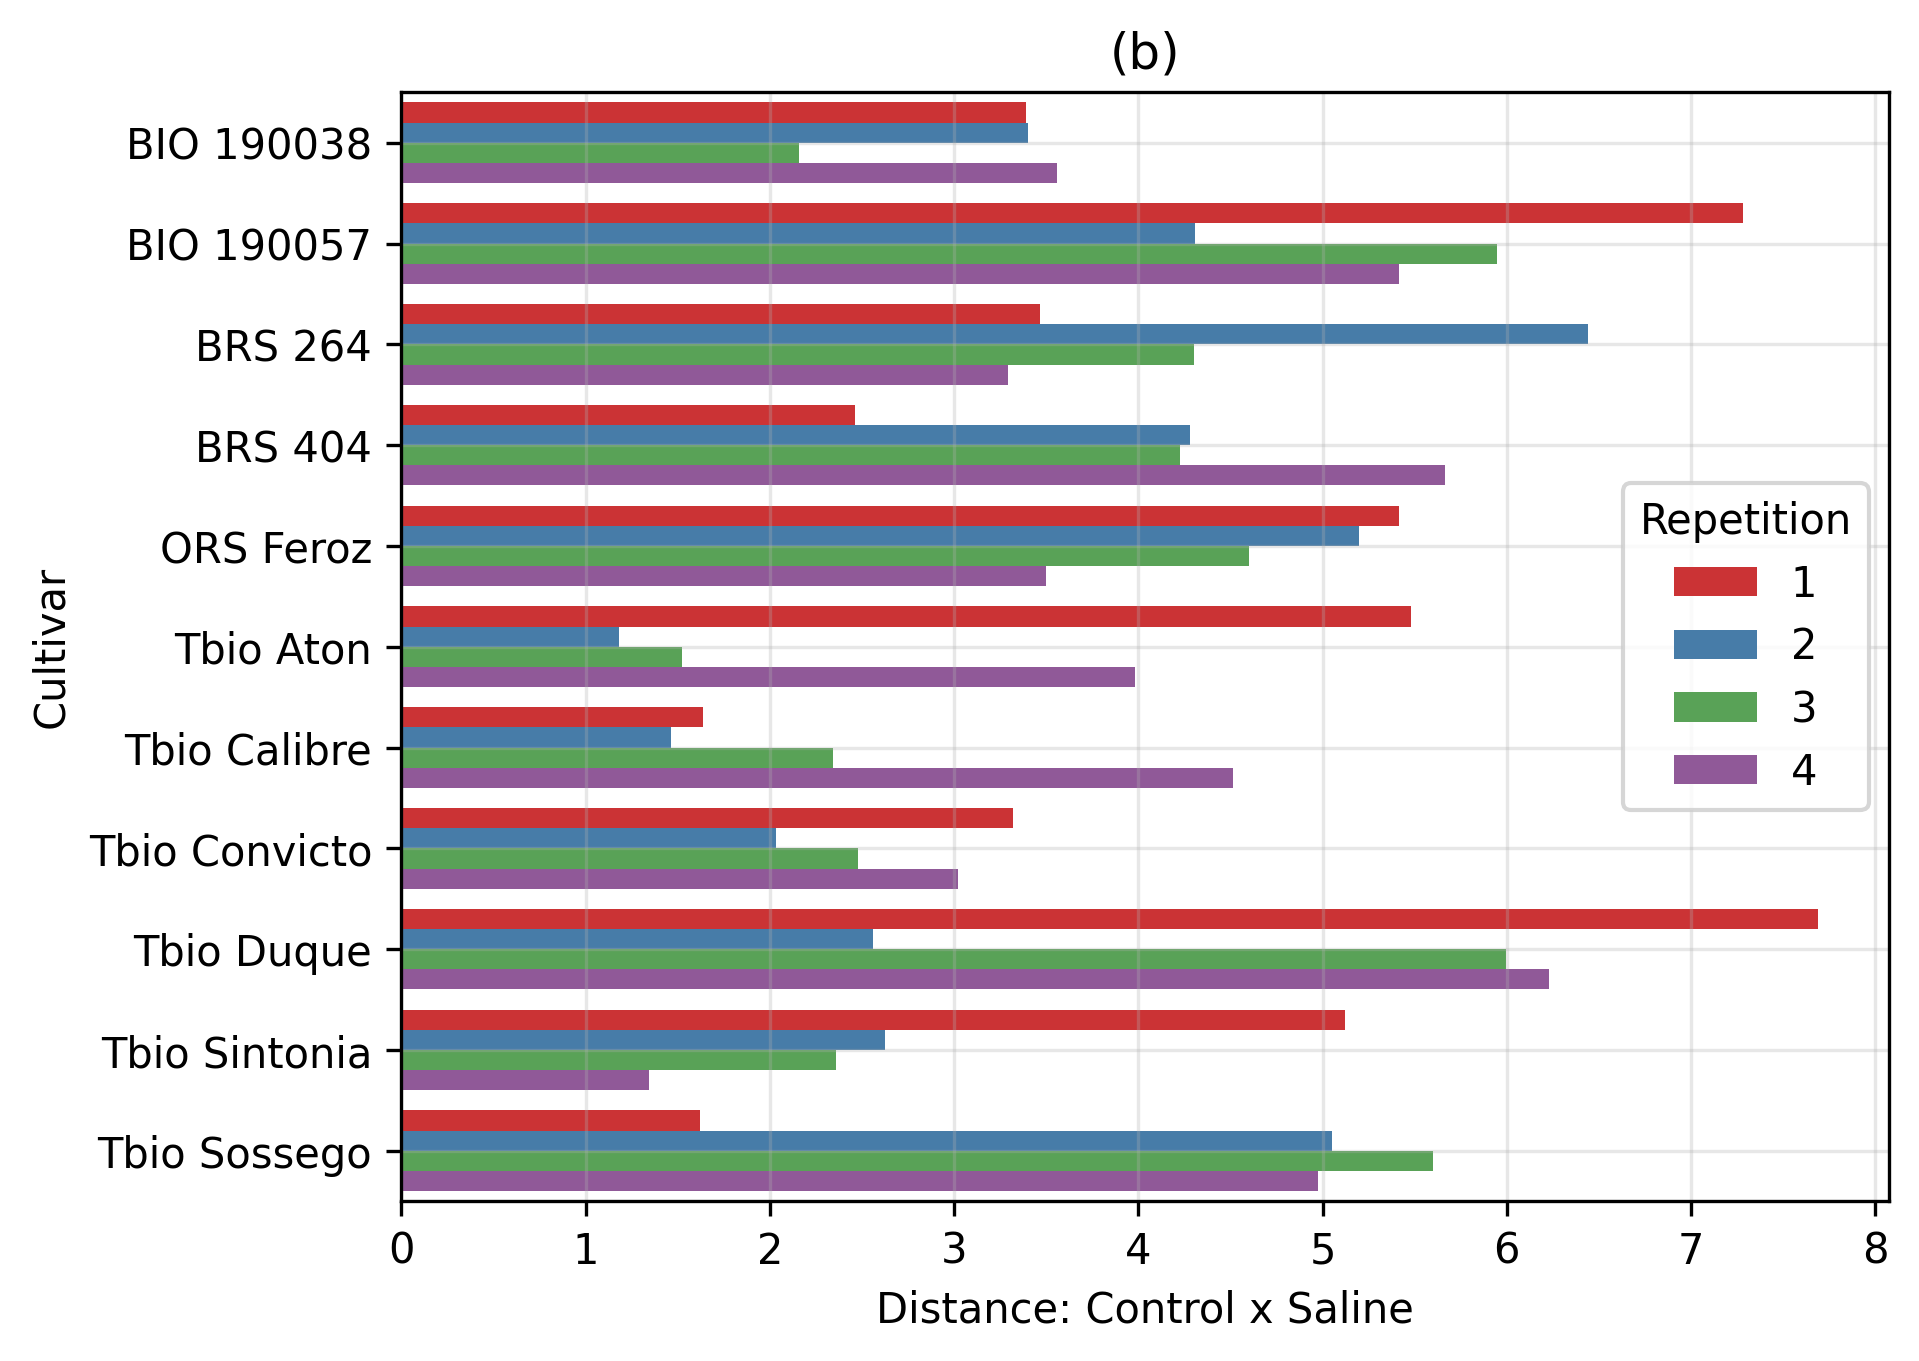

In [ ]:
# Plot distances by cultivar and Treatment, considering the Repetitions
plt.figure(dpi=300)
sns.barplot(data=df_distances, y='Cultivar', x='Water', palette='Set1', orient='h', hue="Repetition")
plt.title('(a)')
plt.ylabel('Cultivar')
plt.xlabel('Distance: Control x Water')
plt.grid(alpha=0.3)
plt.show()

plt.figure(dpi=300)
sns.barplot(y='Cultivar', x='Saline', data=df_distances, palette='Set1', orient='h', hue="Repetition")
plt.title('(b)')
plt.ylabel('Cultivar')
plt.xlabel('Distance: Control x Saline')
plt.grid(alpha=0.3)
plt.show()

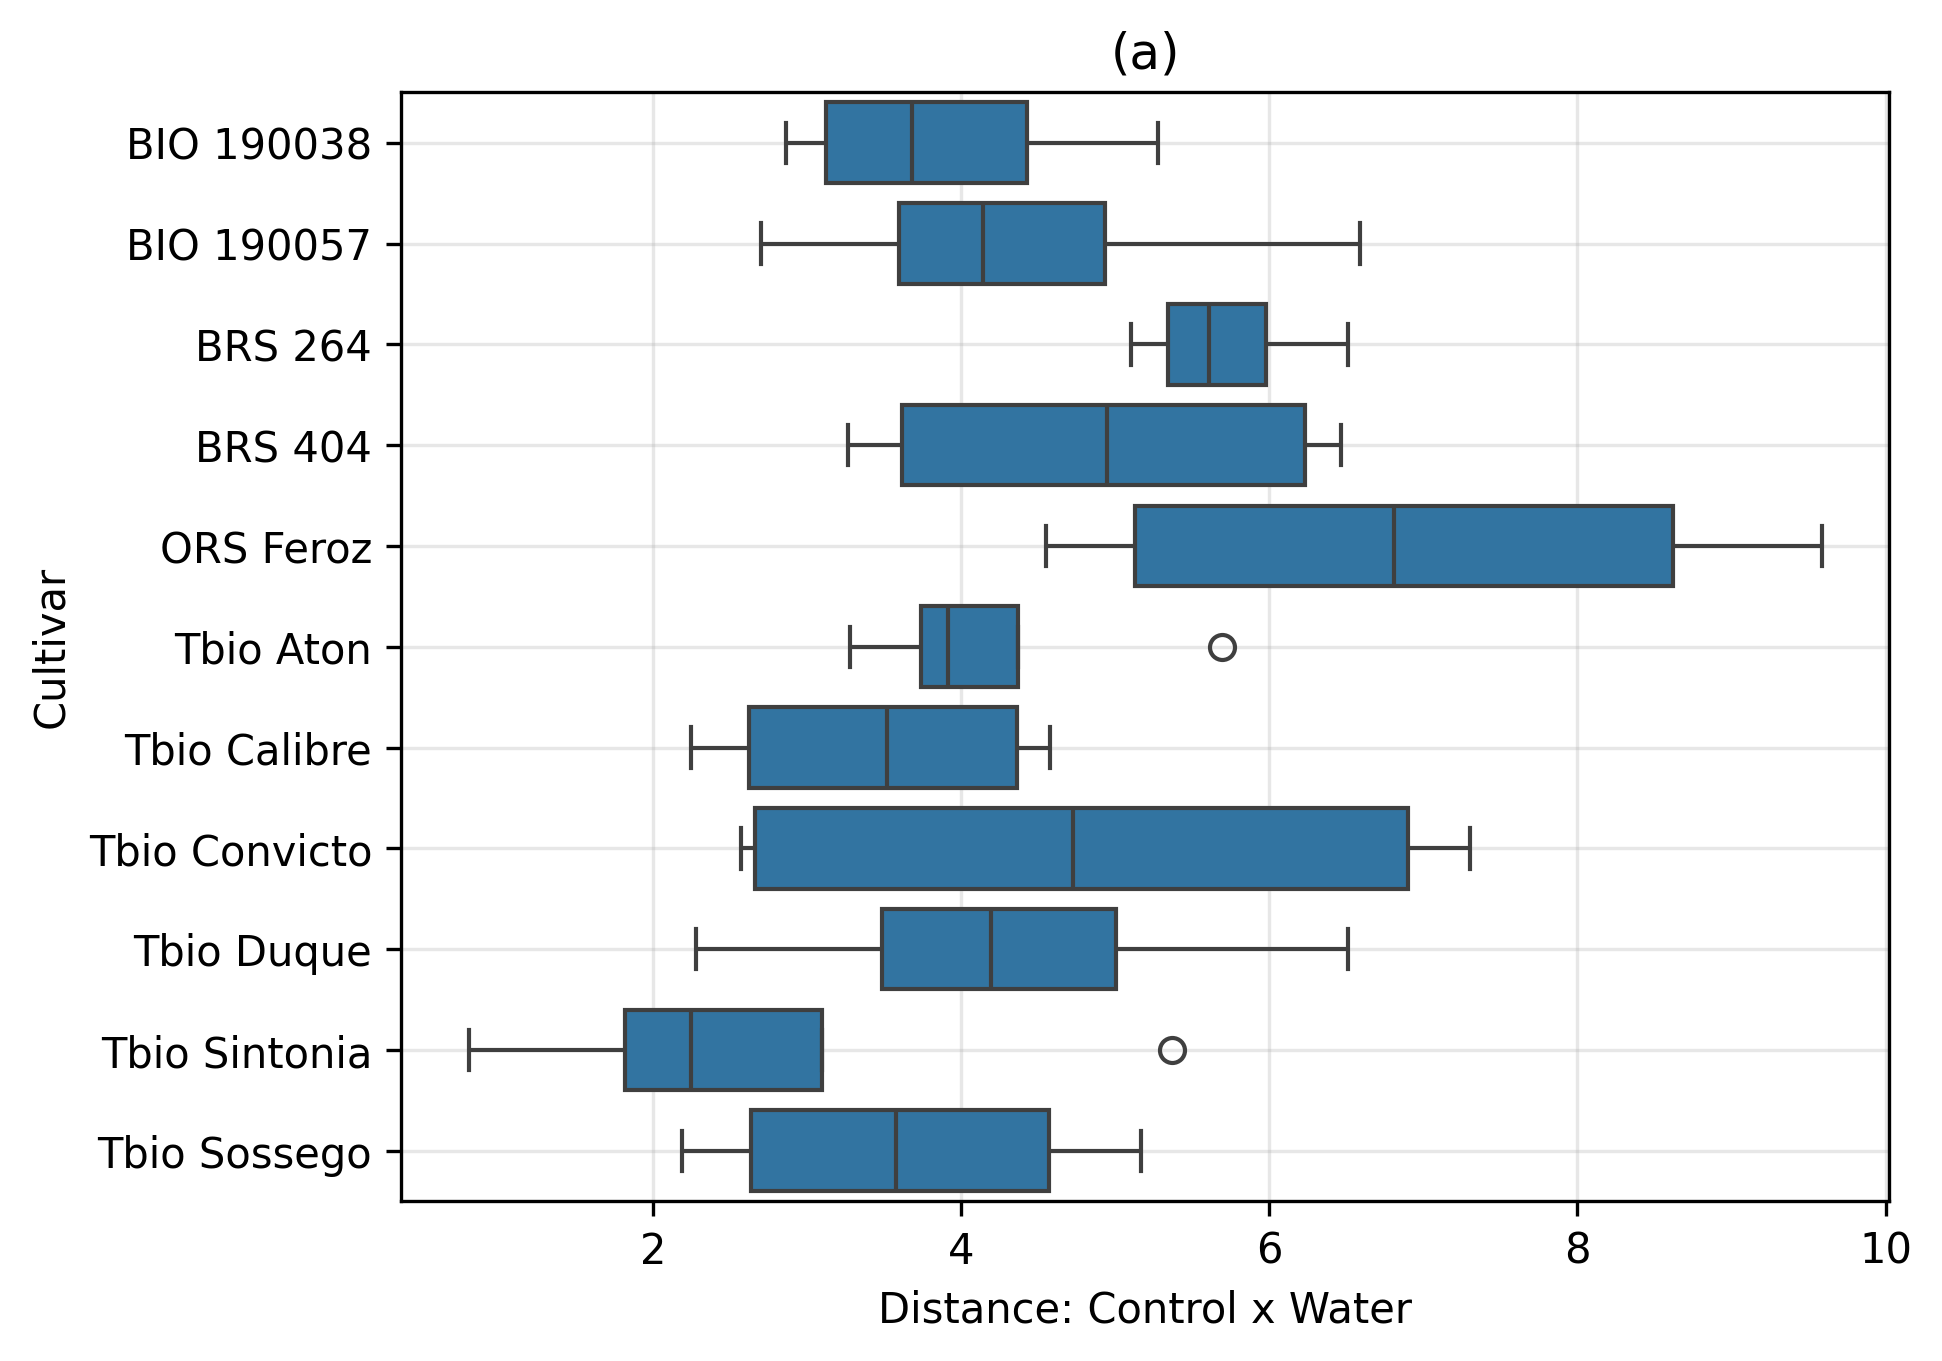

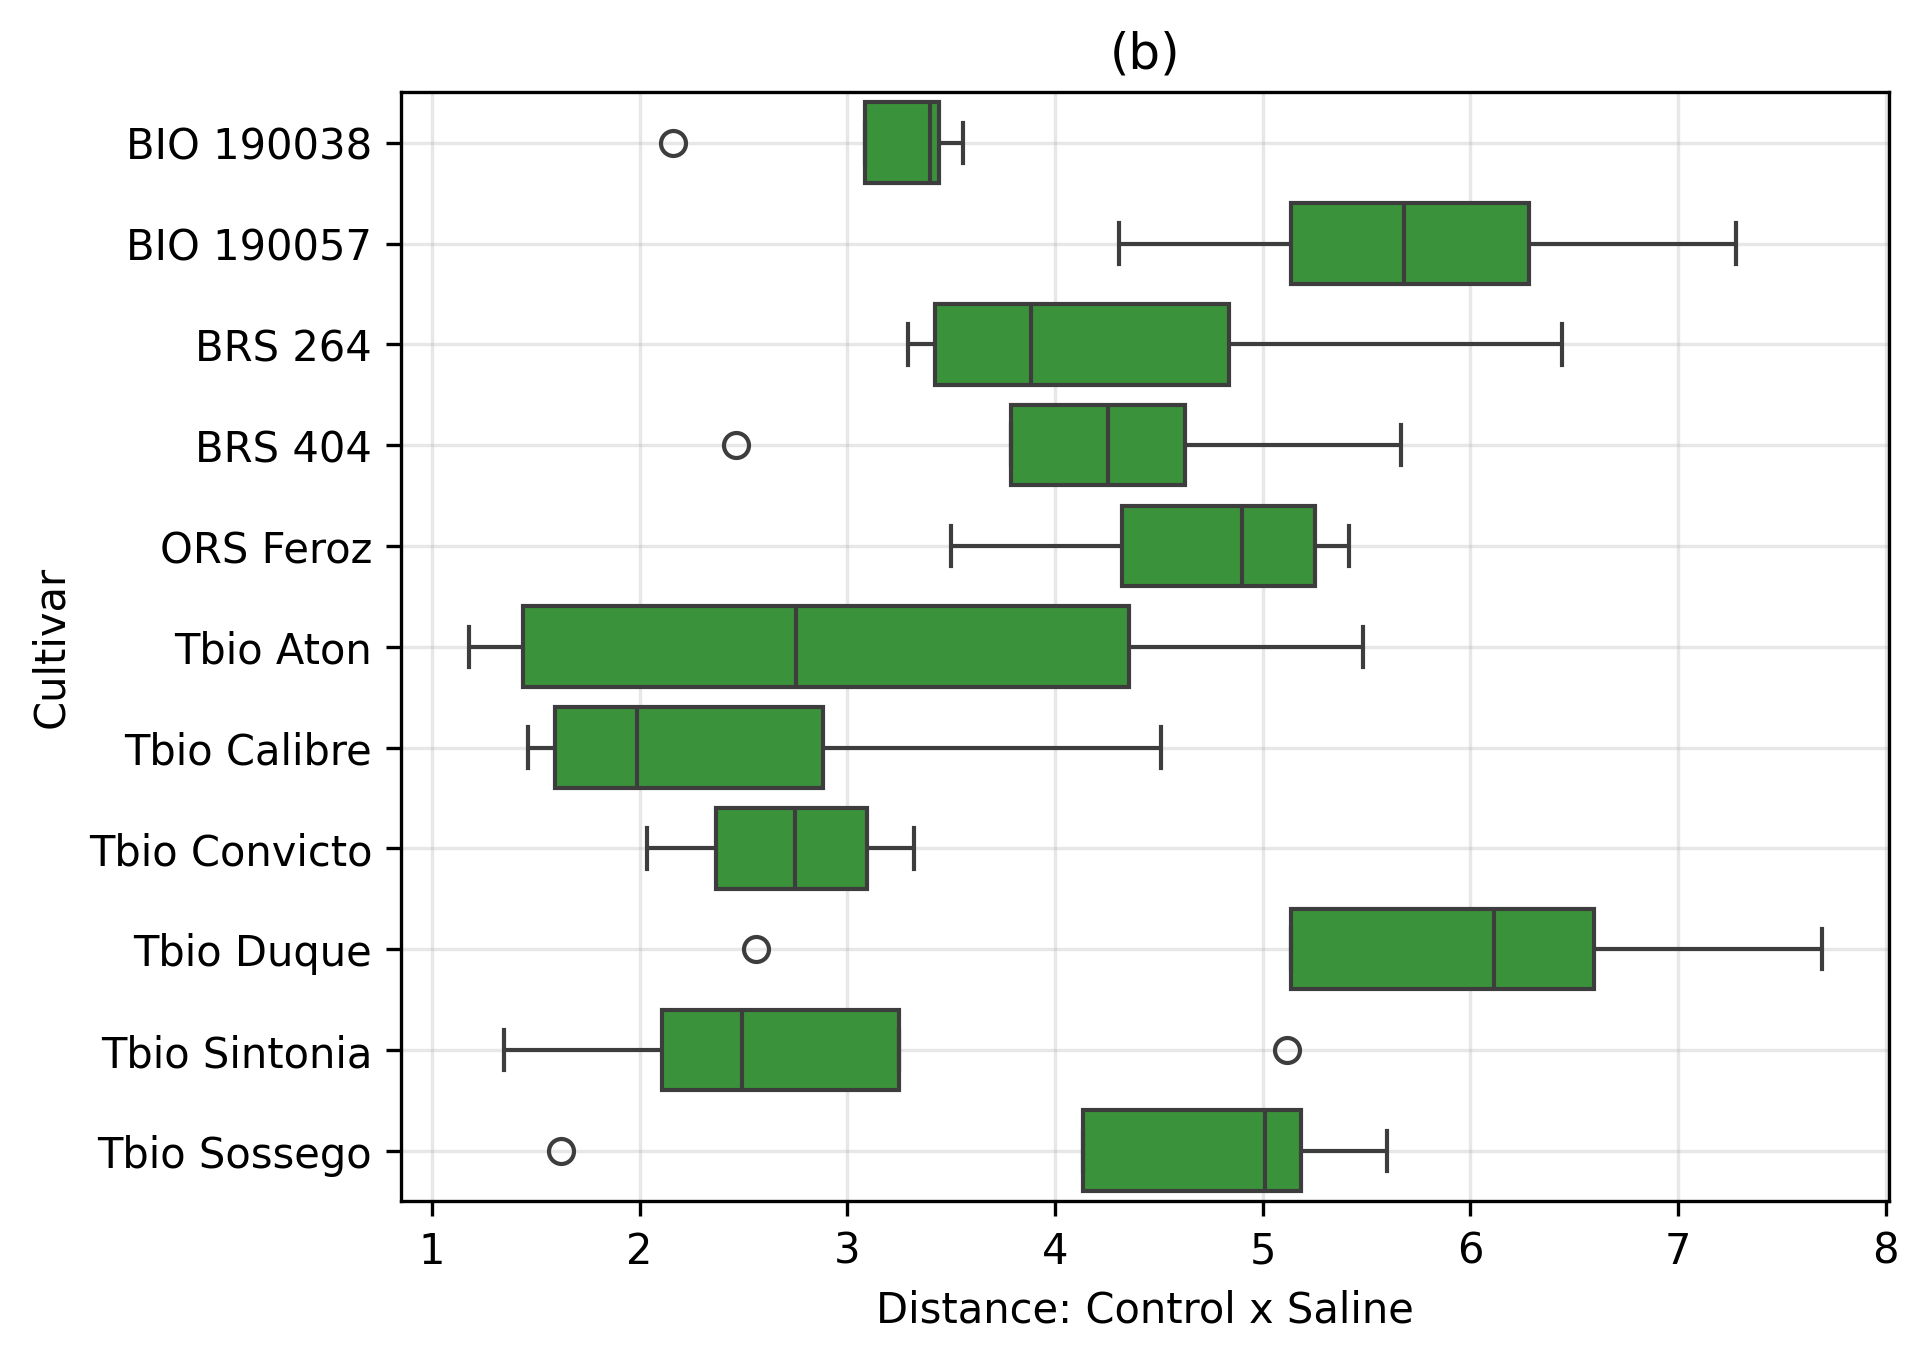

In [ ]:
# Plot distances by cultivar and Treatment, considering the Repetitions
plt.figure(dpi=300)
sns.boxplot(data=df_distances, y='Cultivar', x='Water', color='tab:blue', orient='h')
plt.title('(a)')
plt.ylabel('Cultivar')
plt.xlabel('Distance: Control x Water')
plt.grid(alpha=0.3)
plt.show()

plt.figure(dpi=300)
sns.boxplot(y='Cultivar', x='Saline', data=df_distances, color='tab:green', orient='h')
plt.title('(b)')
plt.ylabel('Cultivar')
plt.xlabel('Distance: Control x Saline')
plt.grid(alpha=0.3)
plt.show()

## For average repetition

In [ ]:

# Creates a new dataframe for distance calculation
df_all_treatment_control_avg = df_all_treatment_control.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_all_treatment_water_avg   = df_all_treatment_water.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_all_treatment_saline_avg  = df_all_treatment_saline.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)

del df_all_treatment_control_avg['Repetition']
del df_all_treatment_water_avg['Repetition']
del df_all_treatment_saline_avg['Repetition']

distances_avg = []

for cultivar in cultivars:

    cultivar_control_avg = df_all_treatment_control_avg[df_all_treatment_control_avg['Cultivar'] == cultivar]
    cultivar_water_avg   = df_all_treatment_water_avg[df_all_treatment_water_avg['Cultivar'] == cultivar]
    cultivar_saline_avg  = df_all_treatment_saline_avg[df_all_treatment_saline_avg['Cultivar'] == cultivar]

    del cultivar_control_avg['Cultivar']
    del cultivar_water_avg['Cultivar']
    del cultivar_saline_avg['Cultivar']

    cultivar_control_avg = np.array(cultivar_control_avg)
    cultivar_water_avg   = np.array(cultivar_water_avg)
    cultivar_saline_avg  = np.array(cultivar_saline_avg)

    d1 = w_dist(np.array(Weights_for_distances), cultivar_water_avg, cultivar_control_avg)
    d2 = w_dist(np.array(Weights_for_distances), cultivar_saline_avg, cultivar_control_avg)

    distances_avg.append([d1, d2])

# Convert to array
distances_avg = np.array(distances_avg)

# Dataframe for distances
df_distances_avg = pd.DataFrame(distances_avg.reshape(-1, 2), columns=['Water', 'Saline'])
df_distances_avg['Cultivar'] = cultivars
display(df_distances_avg)

,Water,Saline,Cultivar
0,3.875186,3.127991,BIO 190038
1,4.393776,5.737278,BIO 190057
2,5.708647,4.375150,BRS 264
3,4.905513,4.159561,BRS 404
4,6.937481,4.678320,ORS Feroz
5,4.200003,3.042219,Tbio Aton
6,3.465408,2.487897,Tbio Calibre
7,4.832091,2.712896,Tbio Convicto
8,4.295744,5.620149,Tbio Duque
9,2.668242,2.862871,Tbio Sintonia


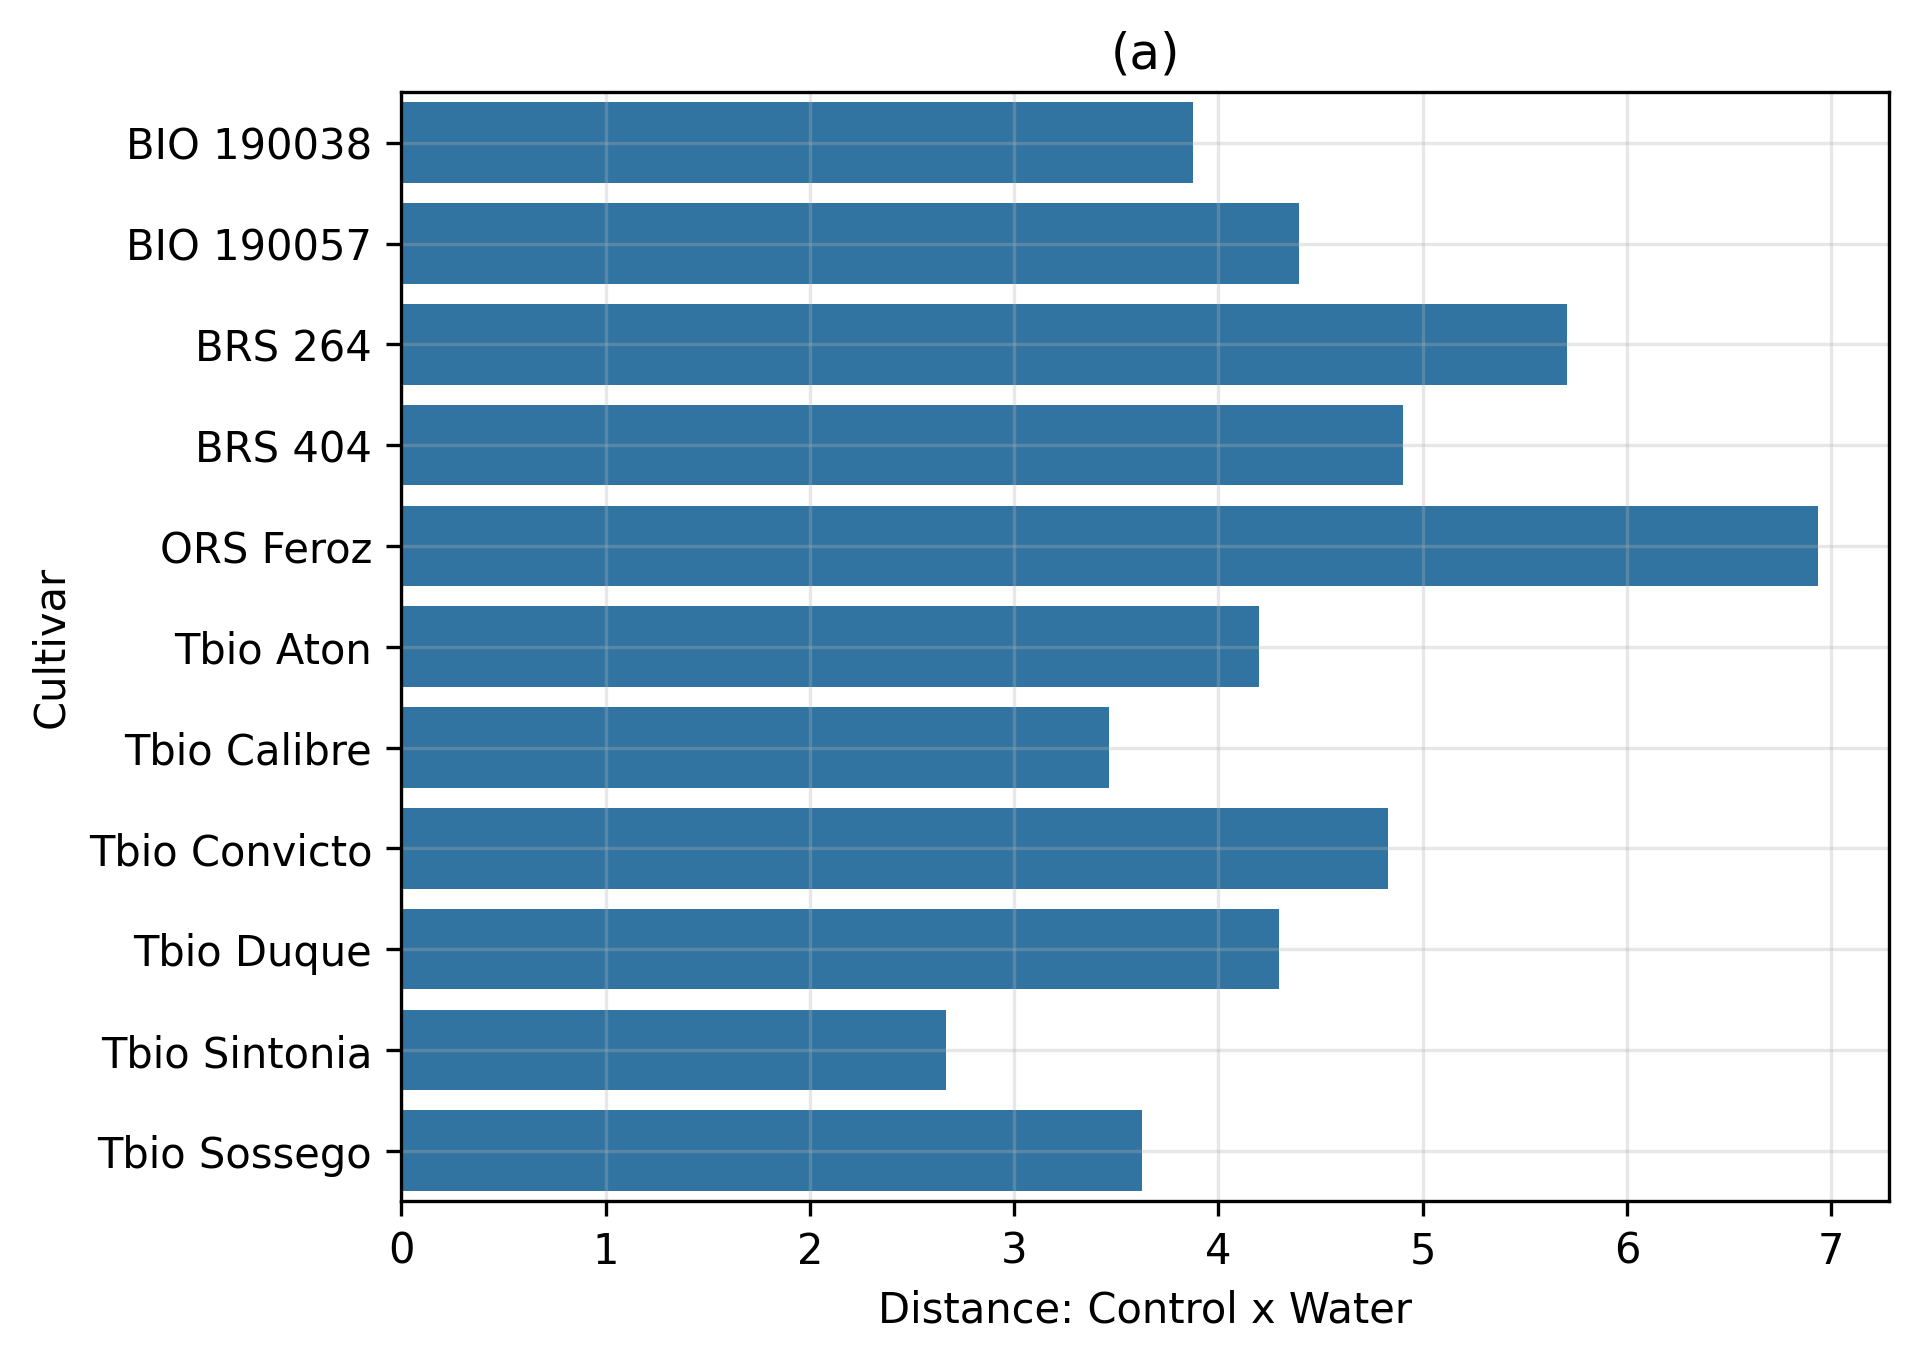

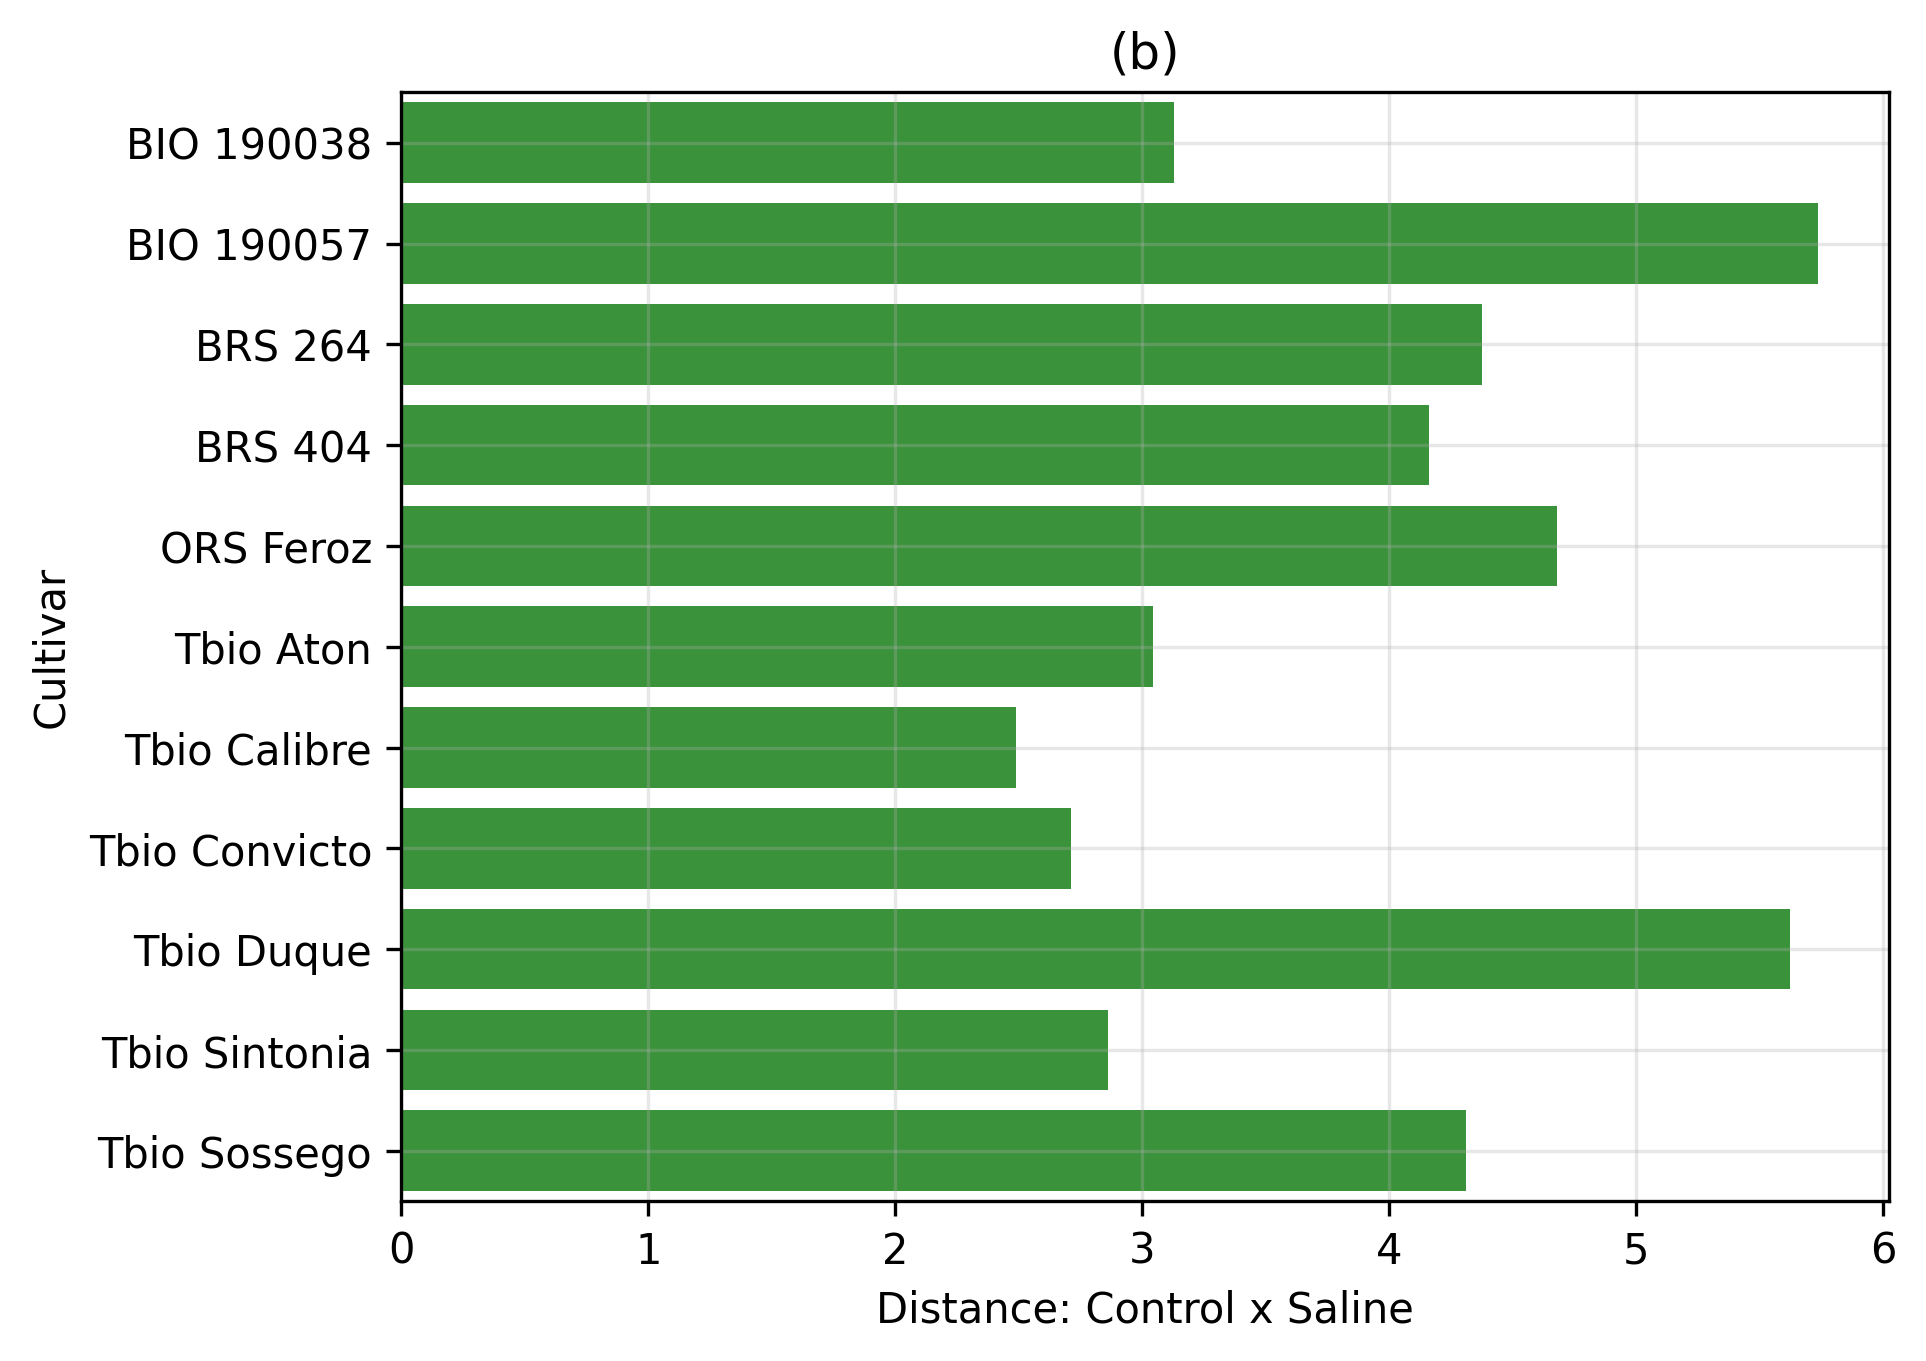

In [ ]:
# Plot distances by cultivar and Treatment, considering the Repetitions
plt.figure(dpi=300)
sns.barplot(data=df_distances_avg, y='Cultivar', x='Water', color='tab:blue', orient='h')
plt.title('(a)')
plt.ylabel('Cultivar')
plt.xlabel('Distance: Control x Water')
plt.grid(alpha=0.3)
plt.show()

plt.figure(dpi=300)
sns.barplot(data=df_distances_avg, y='Cultivar', x='Saline', color='tab:green', orient='h')
plt.title('(b)')
plt.ylabel('Cultivar')
plt.xlabel('Distance: Control x Saline')
plt.grid(alpha=0.3)
plt.show()

# Cultivar selection using AHPTD for each repetition

## Local Selection

Repetition:  1
Better cultivar:  Tbio Sossego 

Repetition:  2
Better cultivar:  Tbio Calibre 

Repetition:  3
Better cultivar:  Tbio Sintonia 

Repetition:  4
Better cultivar:  Tbio Sintonia 



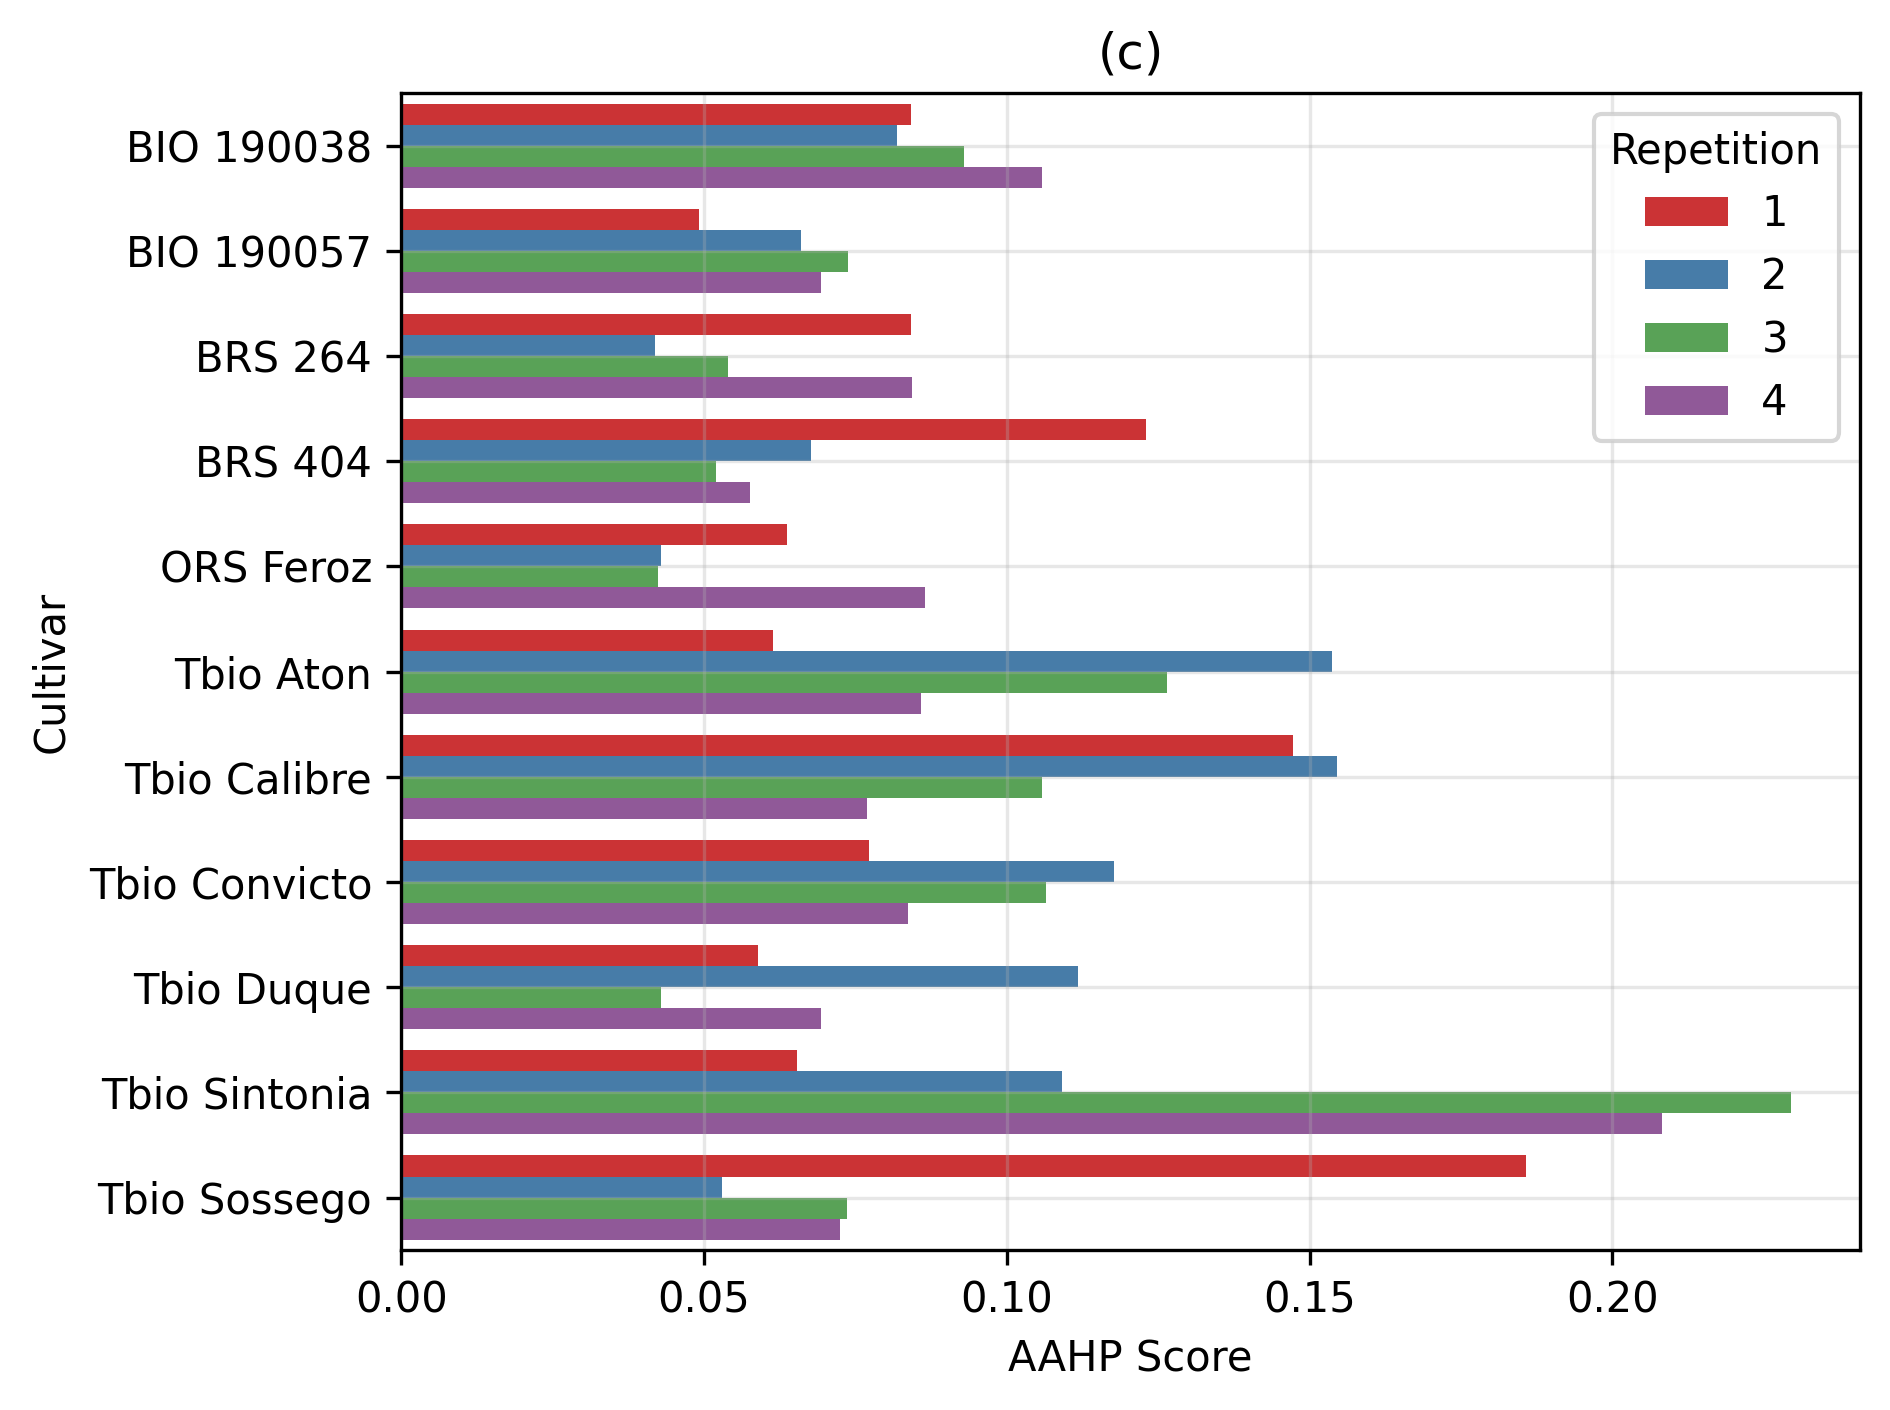

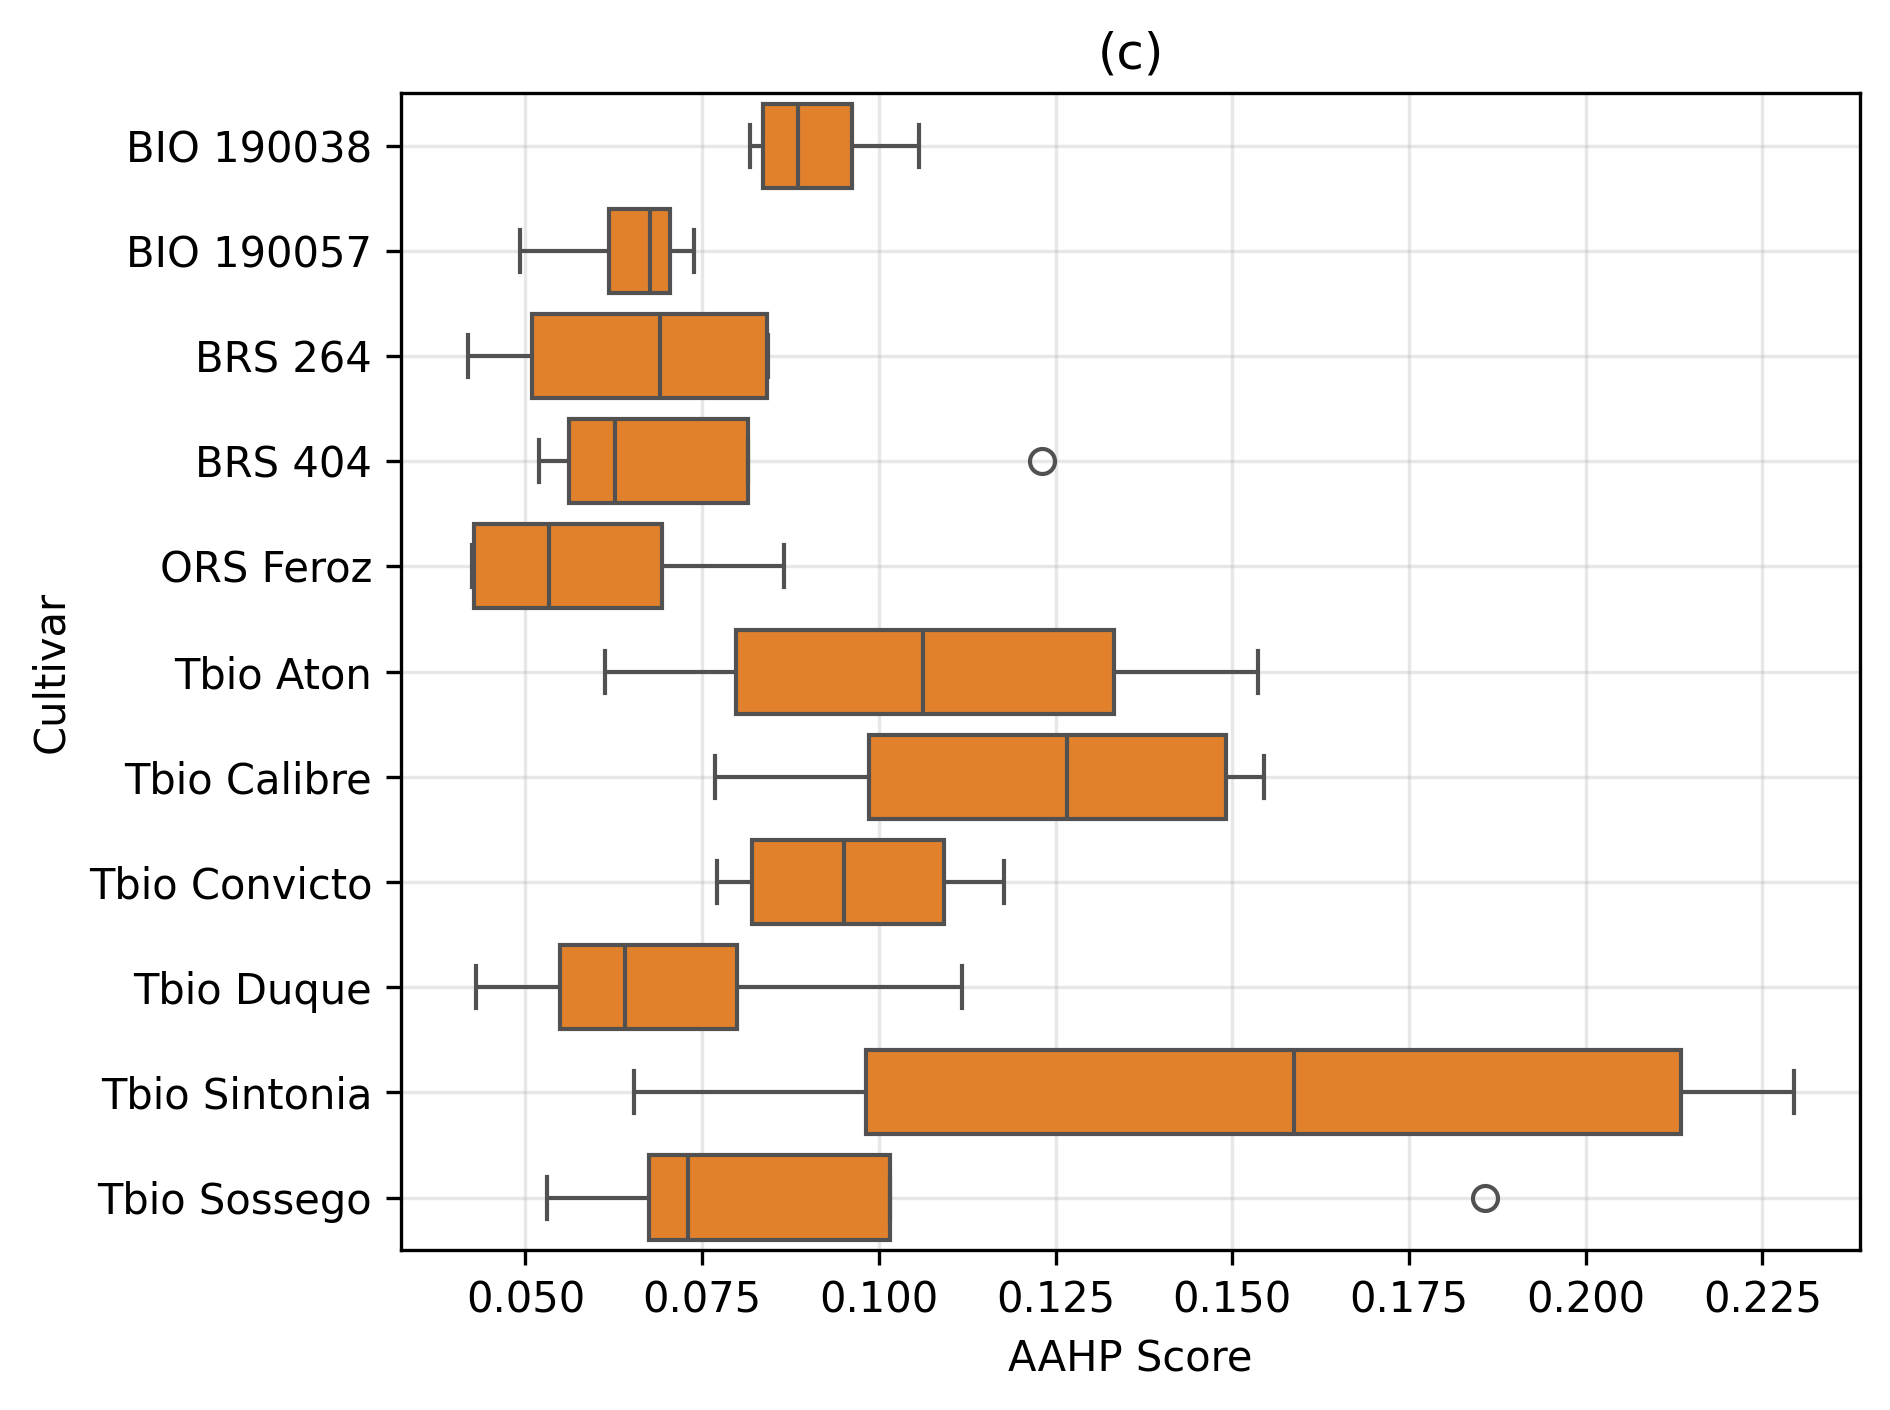

In [ ]:
# Employ the AHPTD for the distances for each Repetition
x_rep = []

for Rep in np.arange(1, 5):

    # AHPTD - Automatic approach
    ahptd_obj = AHPTD()

    df_dist_rep = df_distances[df_distances['Repetition'] == Rep]

    # Values of distance in Control/Water and Control/Saline
    ControlWater  = df_dist_rep['Water'].to_numpy()
    ControlSaline = df_dist_rep['Saline'].to_numpy()

    # Normalize values usingo "the smaller, the more preferable"
    ControlWater_     = ahptd_obj.SMP(ControlWater)
    ControlSaline_    = ahptd_obj.SMP(ControlSaline)

    # Normalized data matrix
    V = np.array([ControlWater_, ControlSaline_]).T

    # Criterion weight
    u = ahptd_obj.CriterionWeight(V)

    # GPV
    x = ahptd_obj.GPV(u, V)
    x_rep.append(x)

    # Show the better cultivar
    ind = np.argmax(x)

    print('Repetition: ', Rep)
    print('Better cultivar: ', cultivars[ind], '\n')

# Dataframe for Repetition
df_x_rep = pd.DataFrame(x_rep, columns=cultivars)
df_x_rep['Repetition'] = np.arange(1, 5)

plt.figure(dpi=300)
df_x_rep_melted = pd.melt(df_x_rep, id_vars=['Repetition'], var_name='Cultivar', value_name='AAHP Score')
sns.barplot(y='Cultivar', x='AAHP Score', hue='Repetition', data=df_x_rep_melted, palette='Set1', orient='h')
plt.grid(alpha=0.3)
plt.ylabel('Cultivar')
plt.xlabel('AAHP Score')
plt.title('(c)')
plt.tight_layout()
plt.show()

plt.figure(dpi=300)
df_x_rep_melted = pd.melt(df_x_rep, id_vars=['Repetition'], var_name='Cultivar', value_name='AAHP Score')
sns.boxplot(y='Cultivar', x='AAHP Score', data=df_x_rep_melted, color='tab:orange', orient='h')
plt.grid(alpha=0.3)
plt.ylabel('Cultivar')
plt.xlabel('AAHP Score')
plt.title('(c)')
plt.tight_layout()
plt.show()

## Global selection

Better cultivar:  Tbio Sintonia 



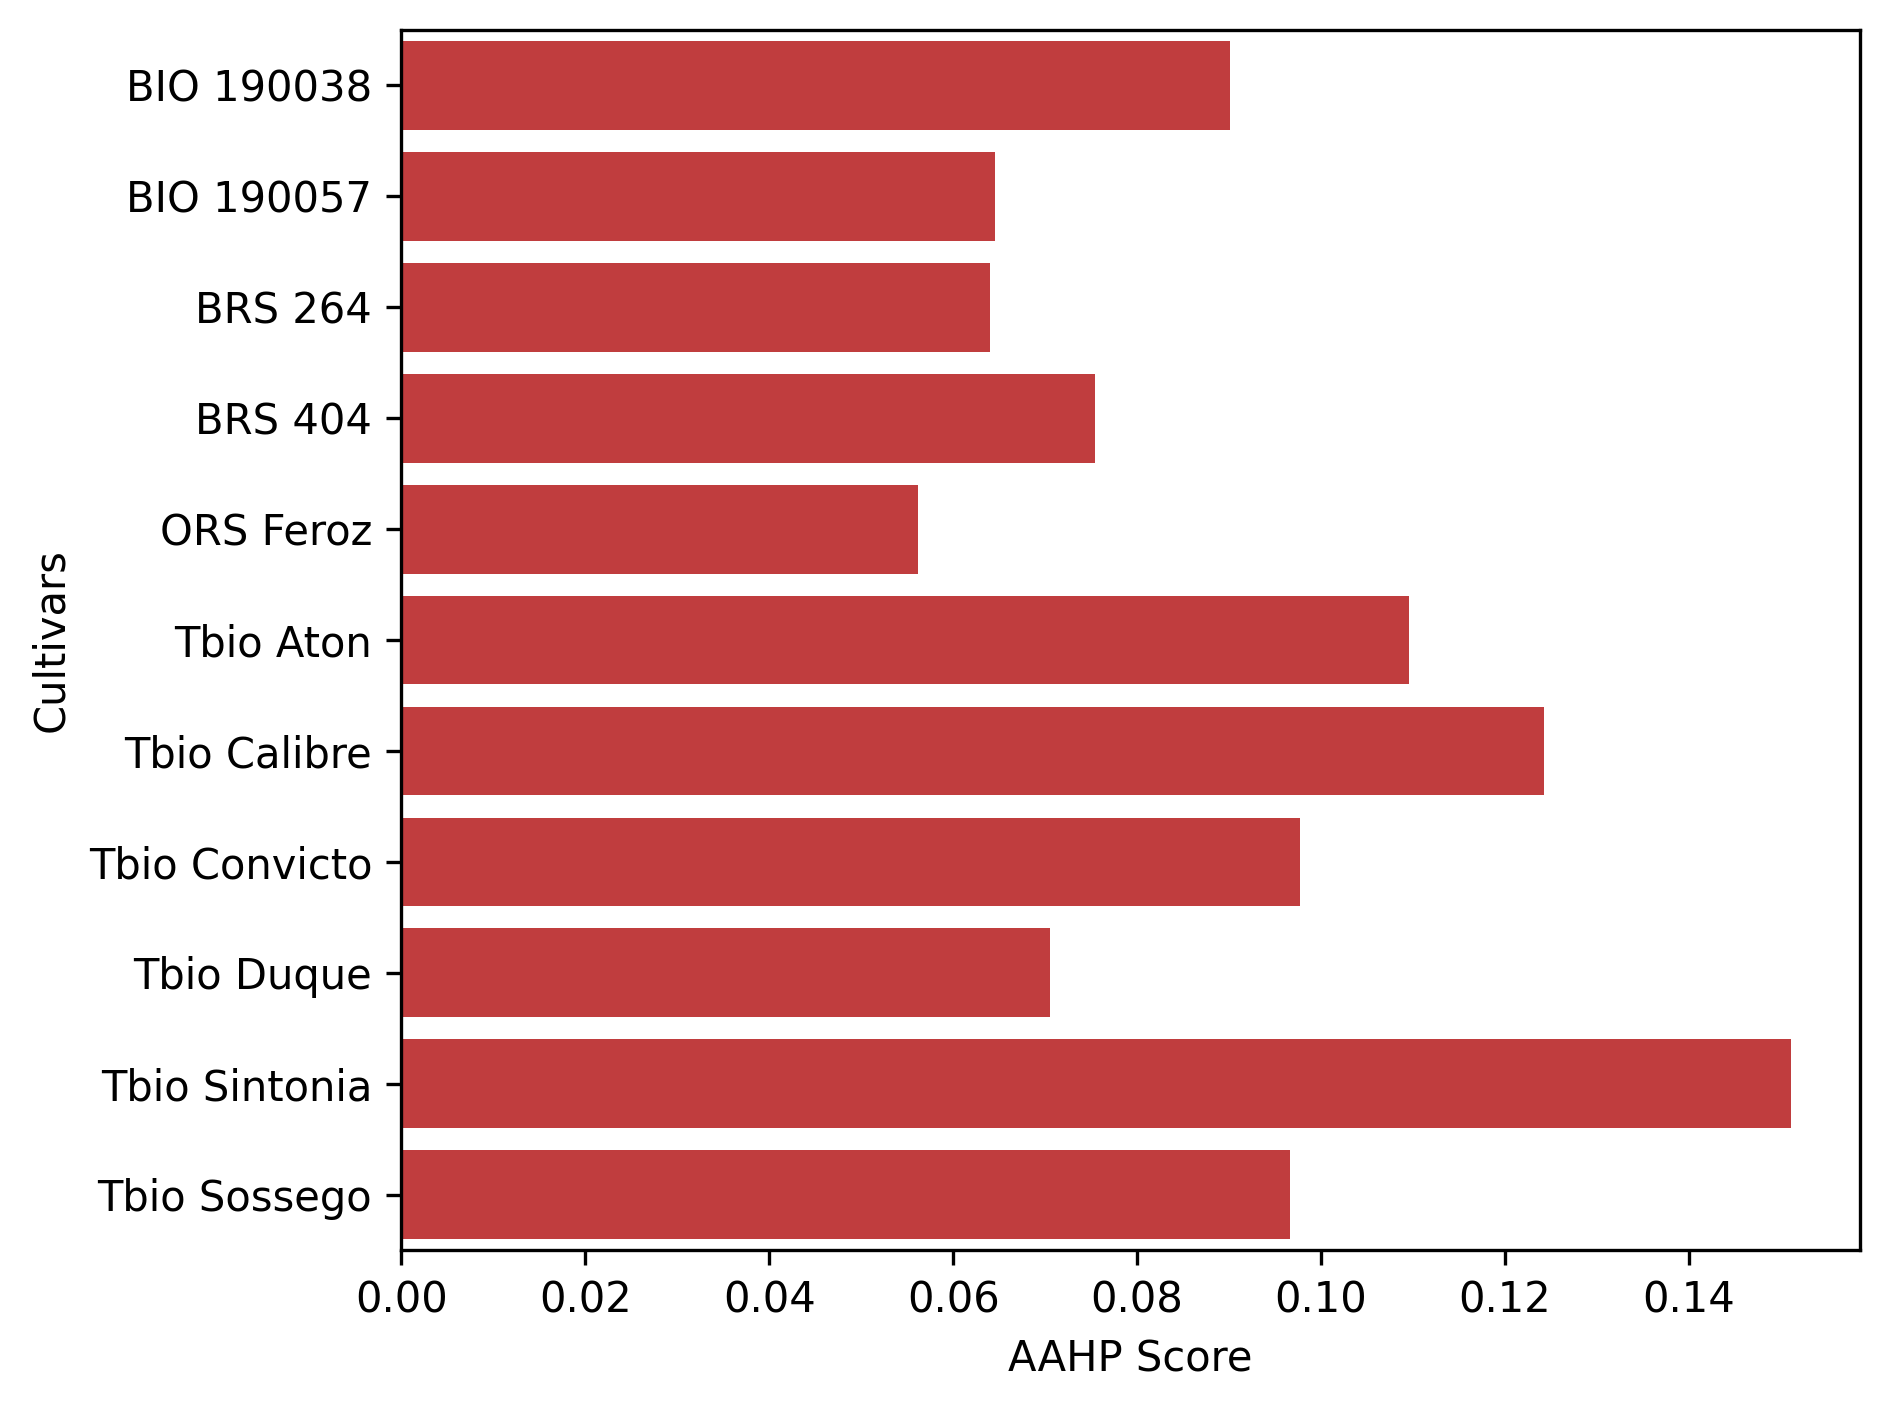

Selection


,Cultivar,AAHP
9,Tbio Sintonia,0.151039
6,Tbio Calibre,0.124204
5,Tbio Aton,0.109577
7,Tbio Convicto,0.097752
10,Tbio Sossego,0.096622
0,BIO 190038,0.090098
3,BRS 404,0.075470
8,Tbio Duque,0.070476
1,BIO 190057,0.064553
2,BRS 264,0.064053


In [ ]:
# Employ the AHPTD for the previous weights x_rep
# AHPTD - Automatic approach
ahptd_obj = AHPTD()

# Convert to array
x_rep = np.array(x_rep)

# Values for AHPTD
data_rep1 = x_rep[0,:]
data_rep2 = x_rep[1,:]
data_rep3 = x_rep[2,:]
data_rep4 = x_rep[3,:]


# Normalize values using "the larger, the more preferable"
data_rep1_ = ahptd_obj.LMP(data_rep1)
data_rep2_ = ahptd_obj.LMP(data_rep2)
data_rep3_ = ahptd_obj.LMP(data_rep3)
data_rep4_ = ahptd_obj.LMP(data_rep4)

# Normalized data matrix
V = np.array([data_rep1_, data_rep2_, data_rep3_, data_rep4_]).T

# Criterion weight
u = ahptd_obj.CriterionWeight(V)

# GPV
x = ahptd_obj.GPV(u, V)

# Show the better cultivar
ind = np.argmax(x)

print('Better cultivar: ', cultivars[ind], '\n')

# Show final weights of Cultivars
df_x = pd.DataFrame({'Cultivar': cultivars, 'AAHP': x})

plt.figure(dpi=300)
sns.barplot(x='AAHP', y='Cultivar', data=df_x, orient='h', color='tab:red')
plt.xlabel('AAHP Score')
plt.ylabel('Cultivars')
plt.tight_layout()
plt.show()

# Selection by ascending order
print('Selection')
df_x.sort_values(by=['AAHP'], ascending=False)

# Cultivar selection using AHPTD in average values

## Selection for each Repetition independently

Better cultivar:  Tbio Sintonia 



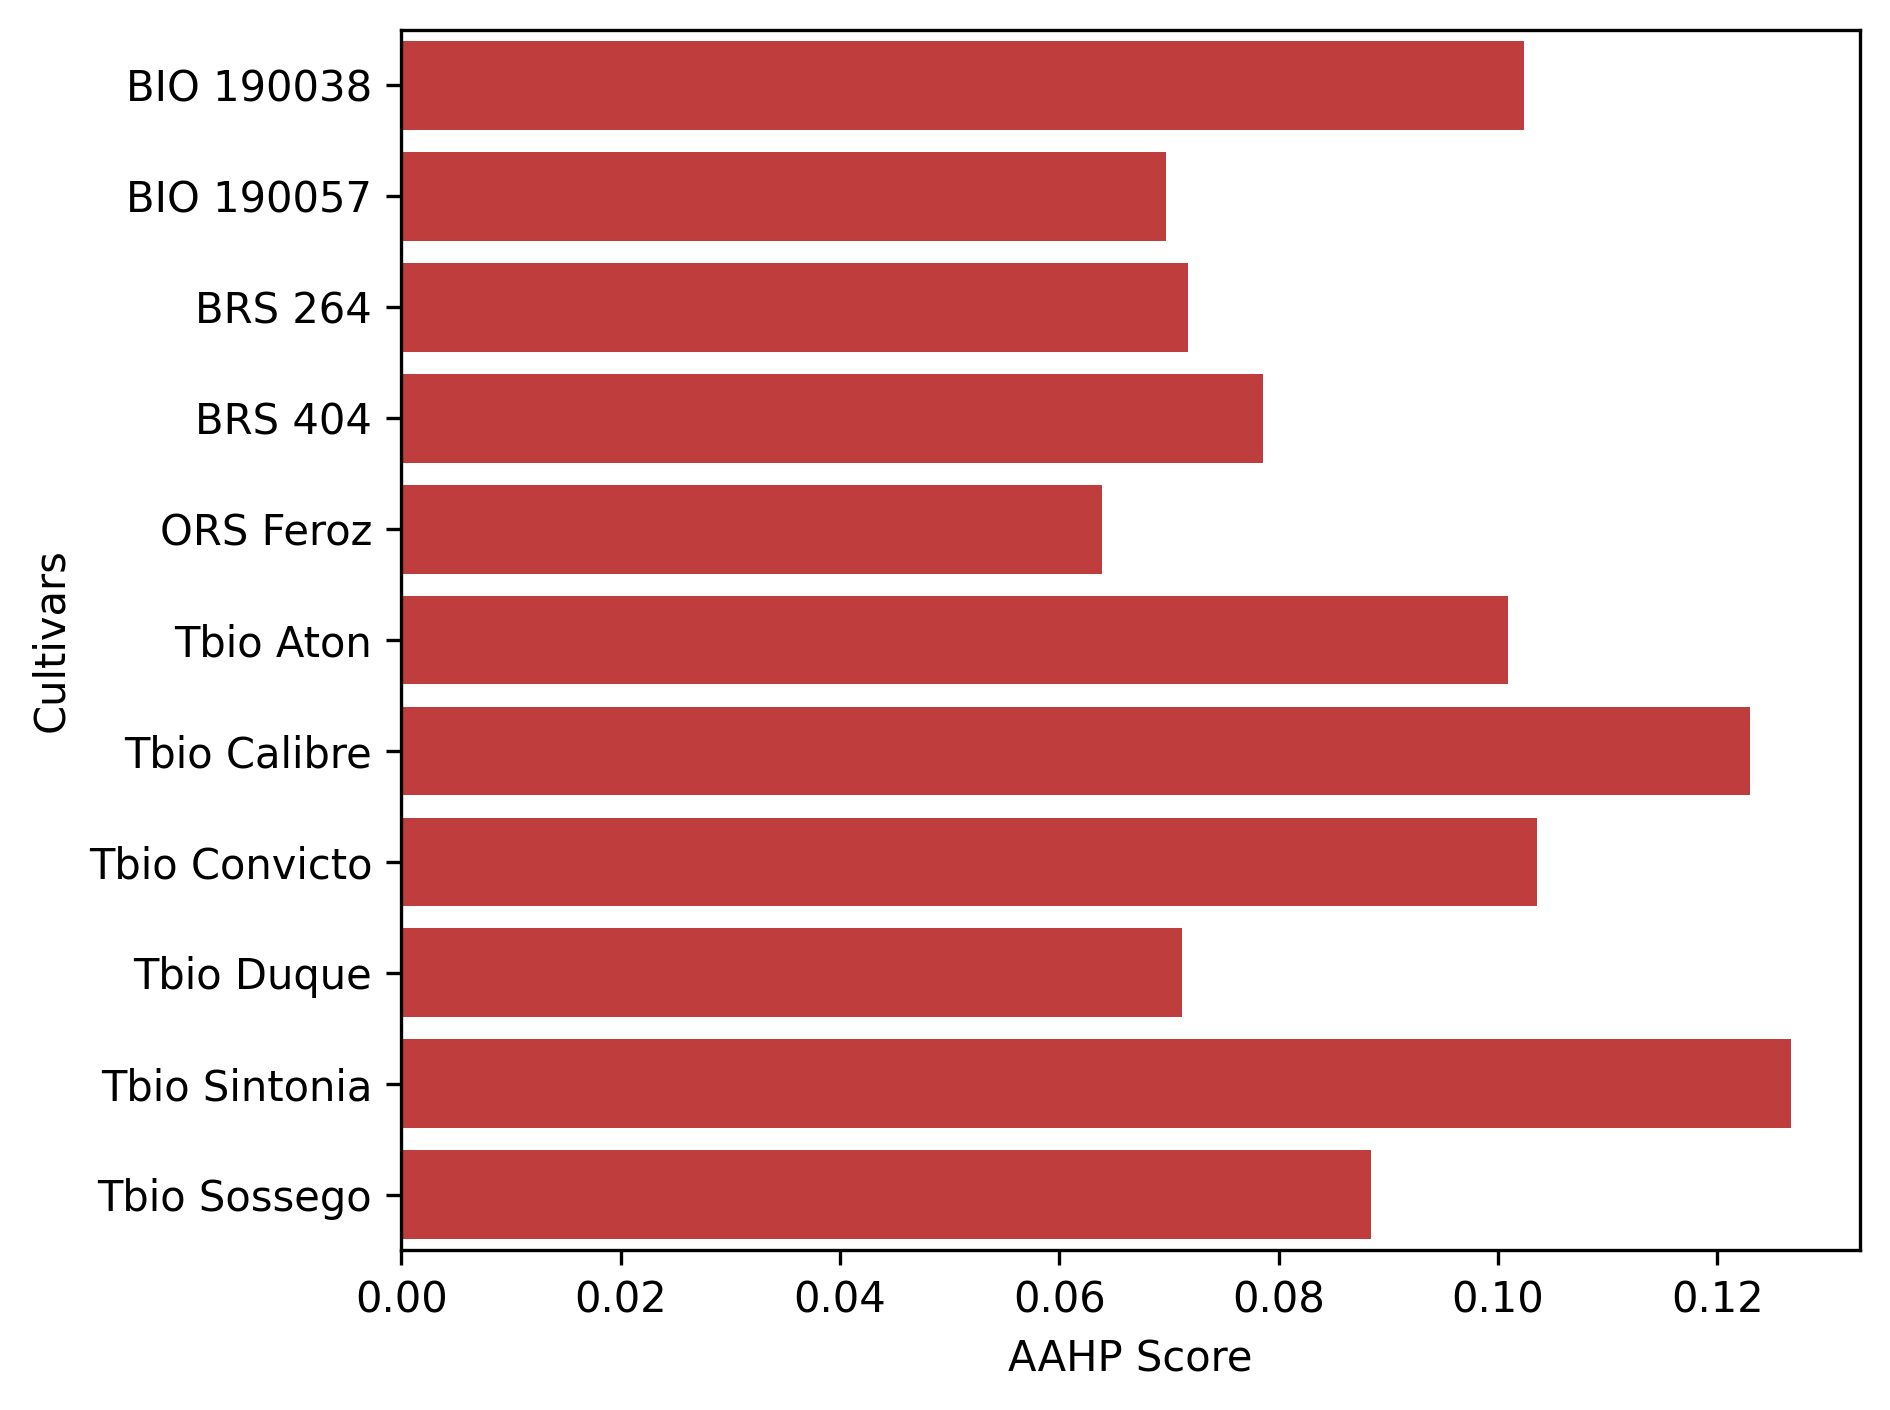

Selection


,Cultivar,AAHP
9,Tbio Sintonia,0.126666
6,Tbio Calibre,0.122995
7,Tbio Convicto,0.103593
0,BIO 190038,0.102378
5,Tbio Aton,0.100921
10,Tbio Sossego,0.088384
3,BRS 404,0.078551
2,BRS 264,0.071708
8,Tbio Duque,0.071203
1,BIO 190057,0.069679


In [ ]:
# Employ the AHPTD for the previous weights x_rep
# AHPTD - Automatic approach
ahptd_obj = AHPTD()

# Values for AHPTD
data_d1 = distances_avg[:,0]
data_d2 = distances_avg[:,1]

# Normalize values using "the larger, the more preferable"
data_d1_ = ahptd_obj.SMP(data_d1)
data_d2_ = ahptd_obj.SMP(data_d2)

# Normalized data matrix
V = np.array([data_d1_, data_d2_]).T

# Criterion weight
u = ahptd_obj.CriterionWeight(V)

# GPV
x = ahptd_obj.GPV(u, V)

# Show the better cultivar
ind = np.argmax(x)

print('Better cultivar: ', cultivars[ind], '\n')

# Show final weights of Cultivars
df_x_avg = pd.DataFrame({'Cultivar': cultivars, 'AAHP': x})

plt.figure(dpi=300)
sns.barplot(x='AAHP', y='Cultivar', data=df_x_avg, orient='h', color='tab:red')
plt.xlabel('AAHP Score')
plt.ylabel('Cultivars')
plt.tight_layout()
plt.show()

# Selection by ascending order
print('Selection')
df_x_avg.sort_values(by=['AAHP'], ascending=False)